# Loan Default Prediction Project - Classification Capstone
## Xinyu Jerry Zhao

### <b>Problem Definition</b>

**The context:** Why is this problem important to solve?<br>
- A major proportion of retail bank profit comes from interests in the form of home loans. Bad loan (NPA) usually eat up a major chunk of profits. Therefore, building a machine model that can automatically check the creditworthiness of a customer with high efficiency and low bias is extremely important. 

**The objectives:** What is the intended goal?<br>
- We aim to simplify the decision-making process for home equity lines of credit. The bank's consumer credit department can utilize our model to predict clients who are likely to default on their loan and recommend important features to consider while approving a loan.


**The key questions:** What are the key questions that need to be answered?<br>
- Should we approve a client based on the information he/she provided?
- What kinds of clients are likely to default on their loan?
- What are important features to consider while approving a loan?

**The problem formulation:** What is it that we are trying to solve using data science
- In this research, we will build an empirically derived, statistically sound, and Equal-Credit-Opportunity-Act-complied classification model. The model will be based on the data obtained via the existing loan underwriting process. The model will be built from predictive modeling techniques, but the model created must be interpretable enough to provide a justification for any adverse behavior (rejections).


### **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

### **Import the necessary libraries**

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

### **Read the dataset**

In [10]:
hm=pd.read_csv("hmeq.csv")

In [11]:
# Copying data to another variable to avoid any changes to original data
data=hm.copy()

### **Print the first and last 5 rows of the dataset**

In [12]:
# Display first five rows
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [13]:
# Display last 5 rows
data.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


### **Understand the shape of the dataset**

In [14]:
# Check the shape of the data
data.shape

(5960, 13)

**Insights**
- The data consists of **5960 rows and 12 characteristics** for each client (after taking out first column which is our label)
- There are missing value in the dataset and require data cleaning

### **Check the data types of the columns**

In [15]:
# Check info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Insights**
- We can see that every column except bad and loan amount have missing values. The Debt-to-income ratio column has more than 1000 missing value.

### **Check for missing values**

In [16]:
# Analyse missing values - Hint: use isnull() function
data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [17]:
# Check the percentage of missing values in the each column.
# Hint: divide the result from the previous code by the number of rows in the dataset
print("% of missing values in the each column")
round(data.isnull().sum()/data.shape[0]*100,3)

% of missing values in the each column


BAD         0.000
LOAN        0.000
MORTDUE     8.691
VALUE       1.879
REASON      4.228
JOB         4.681
YOJ         8.641
DEROG      11.879
DELINQ      9.732
CLAGE       5.168
NINQ        8.557
CLNO        3.725
DEBTINC    21.258
dtype: float64

**Insights**
- Every column except label and loan has missing value. 
- DEROG has ~12% value missing and DEBTINC has ~21% of value missing.

### **Think about it:**
- We found the total number of missing values and the percentage of missing values, which is better to consider?
- What can be the limit for % missing values in a column in order to avoid it and what are the challenges associated with filling them and avoiding them? 

1. **Percentage is a better measurement**, it gives a clearer view on how many missing values for each column
2. Dropping too many missing value may lead to **important information loss**. Some rows may only have one or two missing value, avoiding them by dropping them could lead to incomplete information of our analysis.
3. Filling missing value with average, median, mode, etc. could retain important information but could also **create bias** for our analysis. The actual data for the missing value could be very different from the value we filled.

**We can convert the object type columns to categories**

`converting "objects" to "category" reduces the data space required to store the dataframe`

### **Convert the data types**

In [18]:
cols = data.select_dtypes(['object']).columns.tolist()

#adding target variable to this list as this is an classification problem and the target variable is categorical

cols.append('BAD')

In [19]:
cols

['REASON', 'JOB', 'BAD']

In [20]:
# Changing the data type of object type column to category. hint use astype() function
for i in cols:
    data[i] = data[i].astype('category')

In [21]:
# Checking the info again and the datatype of different variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


### **Analyze Summary Statistics of the dataset**

In [22]:
# Analyze the summary statistics for numerical variables
round(data.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
LOAN,5960.0,18607.97,11207.48,1100.00,11100.00,16300.00,23300.00,89900.00
MORTDUE,5442.0,73760.82,44457.61,2063.00,46276.00,65019.00,91488.00,399550.00
VALUE,5848.0,101776.05,57385.78,8000.00,66075.50,89235.50,119824.25,855909.00
YOJ,5445.0,8.92,7.57,0.00,3.00,7.00,13.00,41.00
DEROG,5252.0,0.25,0.85,0.00,0.00,0.00,0.00,10.00
DELINQ,5380.0,0.45,1.13,0.00,0.00,0.00,0.00,15.00
CLAGE,5652.0,179.77,85.81,0.00,115.12,173.47,231.56,1168.23
NINQ,5450.0,1.19,1.73,0.00,0.00,1.00,2.00,17.00
CLNO,5738.0,21.30,10.14,0.00,15.00,20.00,26.00,71.00
DEBTINC,4693.0,33.78,8.60,0.52,29.14,34.82,39.00,203.31


**Insights**
- Min loan amount is 1100, Max is 89900, while std is 11207 and mean is 18608, which shows outliers above 75 percentile.
- The distribution for many columns are skewed to the right (Mean > Median).
- Every column has a max value that far exceed 75 percentile, which indicates outliers.
- average Debt-to-income ratio is 33.78 and number of credit line is 21.
- Most clients have no DEROG and DELINQ report.
- More than half of clients recently have one credit inquiry.
- Average Age of the oldest credit line is 180 months

In [23]:
# Check summary for categorical data - Hint: inside describe function you can use the argument include=['category']
data.describe(include=['category']).T

,count,unique,top,freq
BAD,5960,2,0,4771
REASON,5708,2,DebtCon,3928
JOB,5681,6,Other,2388


In [24]:
data['JOB'].unique()

['Other', NaN, 'Office', 'Sales', 'Mgr', 'ProfExe', 'Self']
Categories (6, object): ['Mgr', 'Office', 'Other', 'ProfExe', 'Sales', 'Self']

**Insights**
- There are two unique value for BAD (Label) category, which are 1 and 0. "0" has the highest frequency
- There are two unique value for REASON category, which are DebtCon and HomeImp. DebtCon has the highest freqency
- There are six unique value for JOB category, which are Office,  Sales, Mgr, ProfExe, Self, Other. Other has the highest frequency

**Let's look at the unique values in all the categorical variables**

In [25]:
# Checking the count of unique values in each categorical column 
cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(data[i].unique())
    print('*'*40)

Unique values in BAD are :
[1, 0]
Categories (2, int64): [0, 1]
****************************************
Unique values in REASON are :
['HomeImp', NaN, 'DebtCon']
Categories (2, object): ['DebtCon', 'HomeImp']
****************************************
Unique values in JOB are :
['Other', NaN, 'Office', 'Sales', 'Mgr', 'ProfExe', 'Self']
Categories (6, object): ['Mgr', 'Office', 'Other', 'ProfExe', 'Sales', 'Self']
****************************************


**Insights**
- There are two unique value, 1/0 for BAD, two unique value, HomeImp/DebtCon for REASON, and six unique value for JOB.

### **Think about it**
- The results above gave the absolute count of unique values in each categorical column. Are absolute values a good measure? 
- If not, what else can be used? Try implementing that. 

In [26]:
# Checking the percentage unique values in each categorical column. Percentage is a better measure! 
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(data[i].nunique())
    print('-'*20)
    print('Percentage of Each Values in',i, 'are :')
    print(round(data[i].value_counts()/data[i].shape[0]*100,2))
    print('*'*40)

Unique values in BAD are :
2
--------------------
Percentage of Each Values in BAD are :
0    80.05
1    19.95
Name: BAD, dtype: float64
****************************************
Unique values in REASON are :
2
--------------------
Percentage of Each Values in REASON are :
DebtCon    65.91
HomeImp    29.87
Name: REASON, dtype: float64
****************************************
Unique values in JOB are :
6
--------------------
Percentage of Each Values in JOB are :
Other      40.07
ProfExe    21.41
Office     15.91
Mgr        12.87
Self        3.24
Sales       1.83
Name: JOB, dtype: float64
****************************************


## **Exploratory Data Analysis (EDA) and Visualization**

## **Univariate Analysis**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables

### **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyze the numerical columns.

In [27]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Using the above function, let's first analyze the Histogram and Boxplot for LOAN

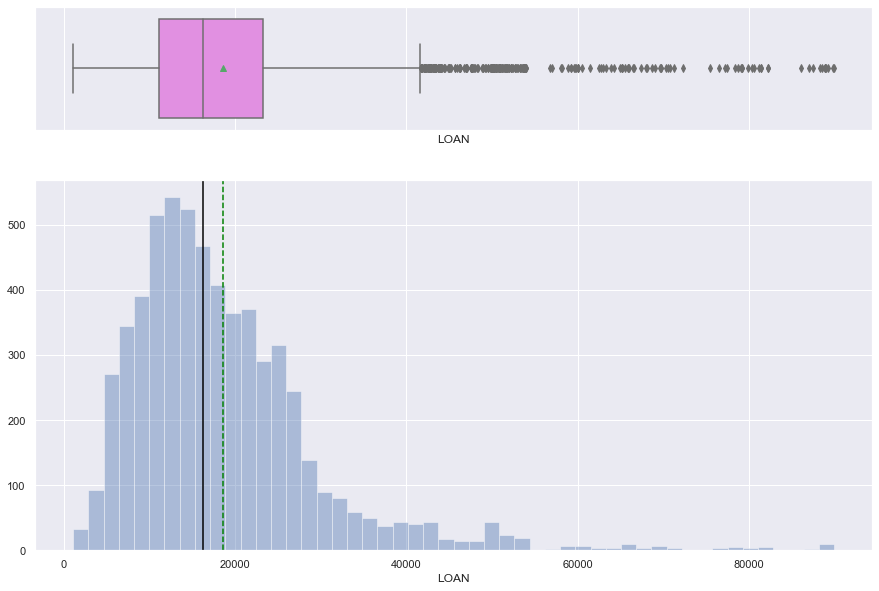

In [28]:
# Build the histogram boxplot for Loan
histogram_boxplot(data['LOAN'])

**Insights**
- The distribution is skewed to the right and there are many outliers above 75 percentile. The mean is larger than the median. 
- Since it is possible to have high loan for very expensive houses, we can leave these outliers untreated.
- Overall the distribution is close to a normal while the mean and median does not deviate too much.

#### **Note:** As done above, analyze Histogram and Boxplot for other variables

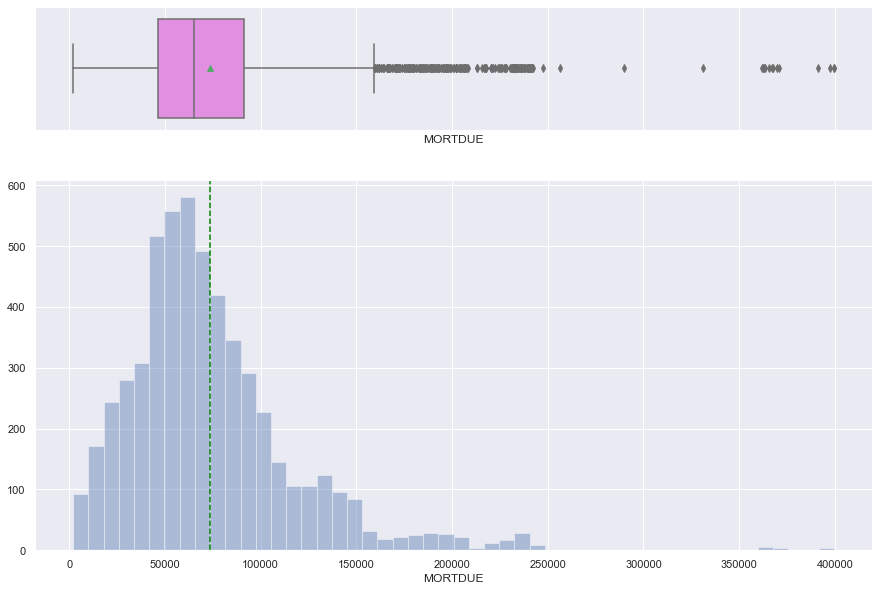

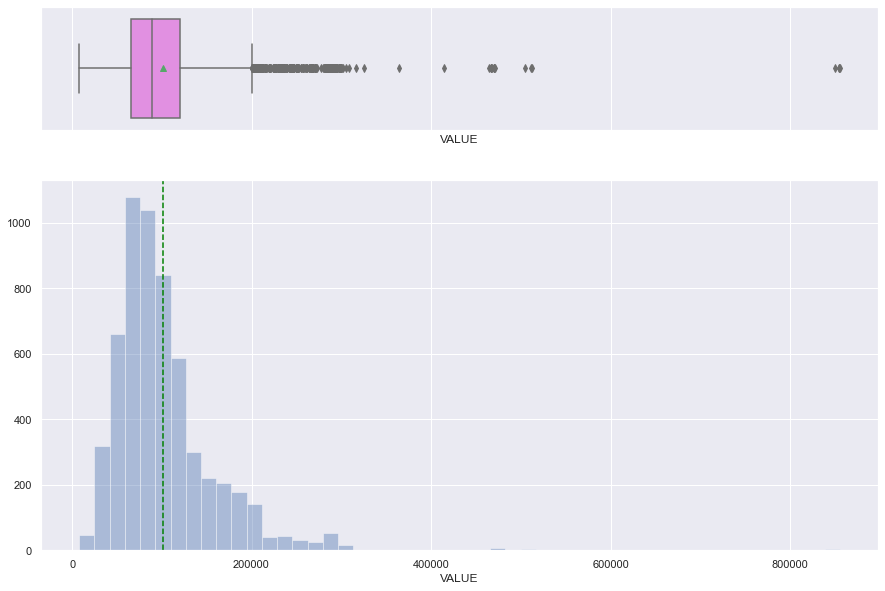

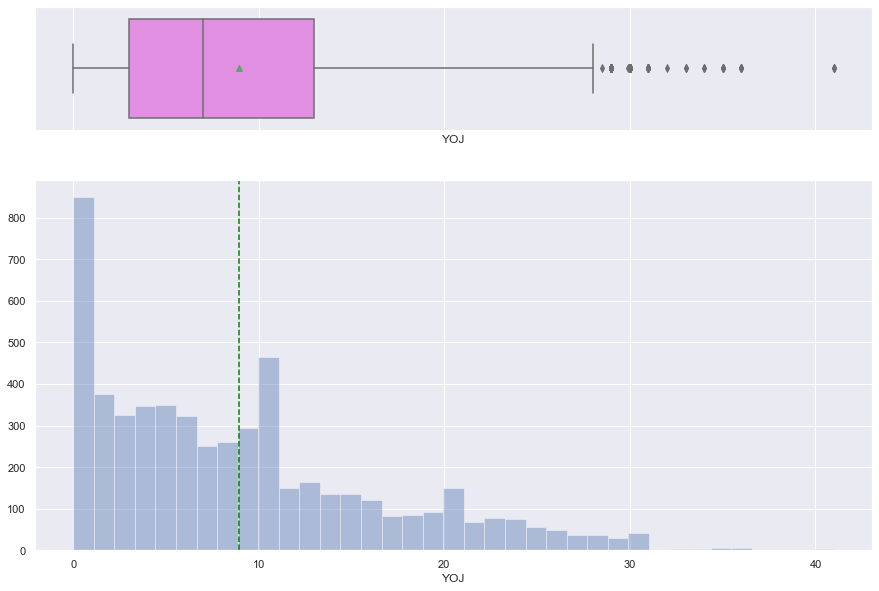

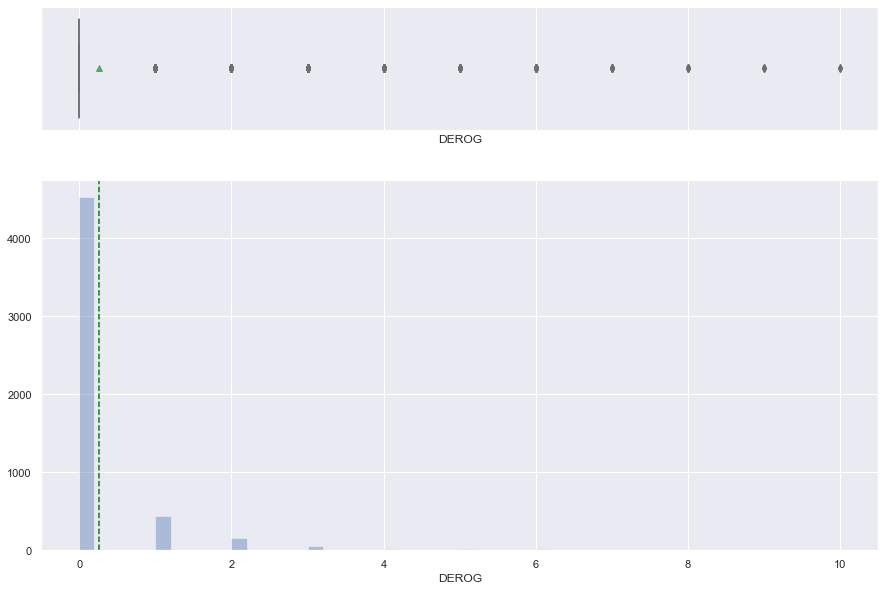

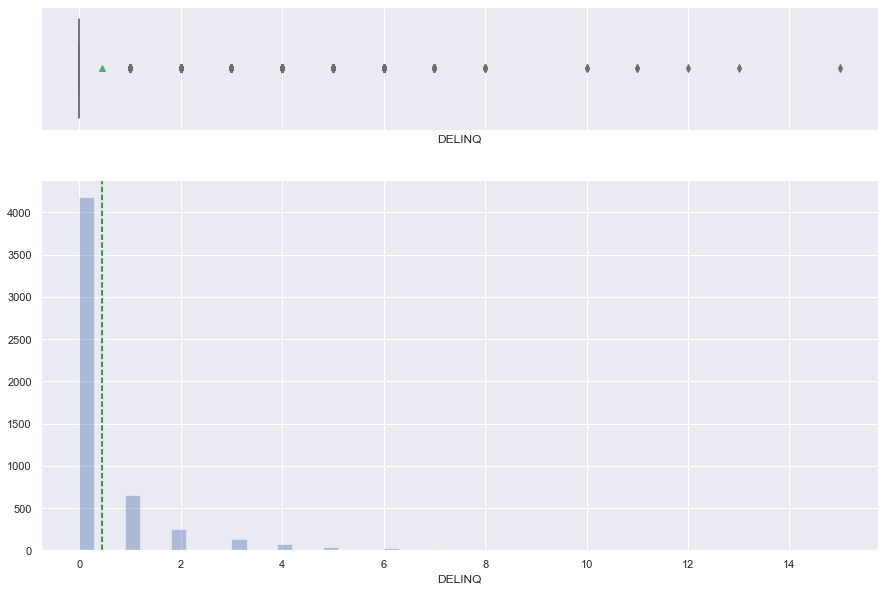

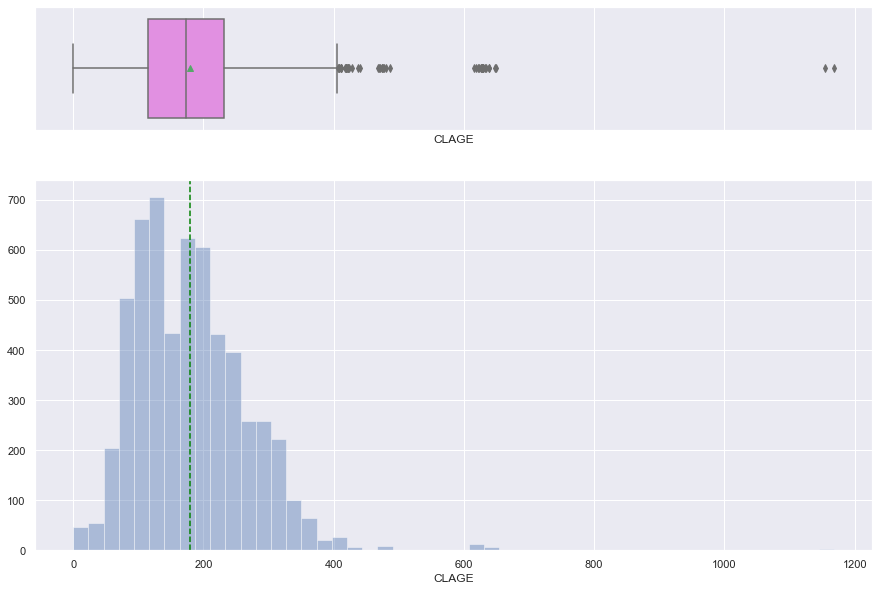

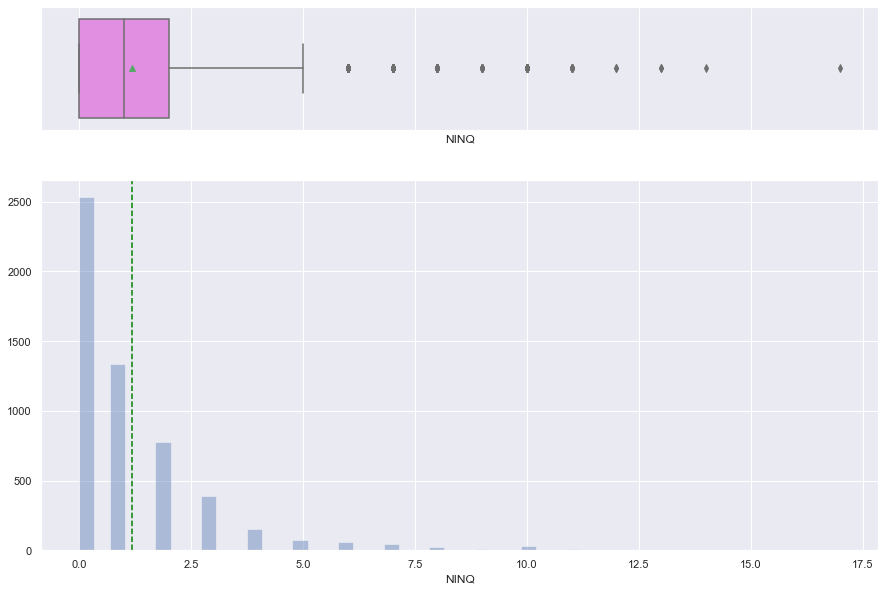

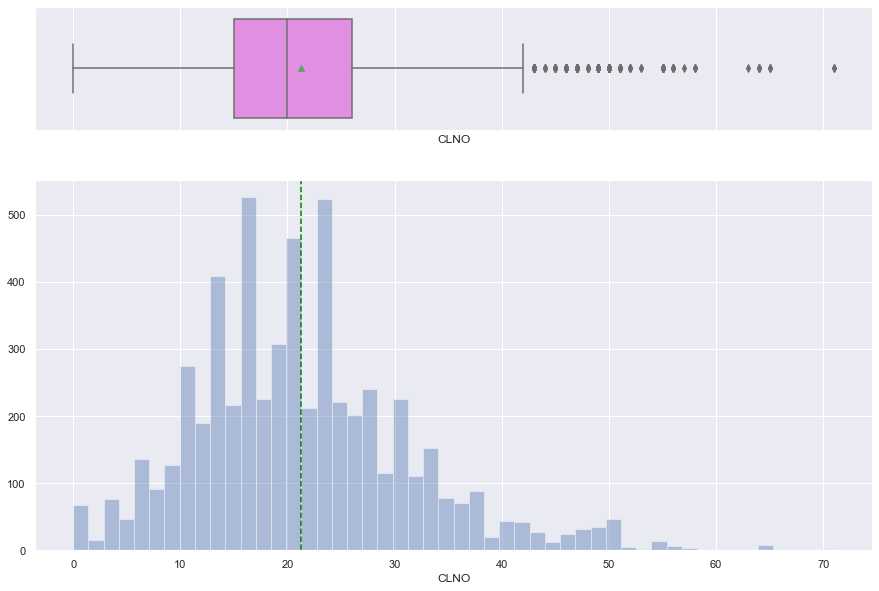

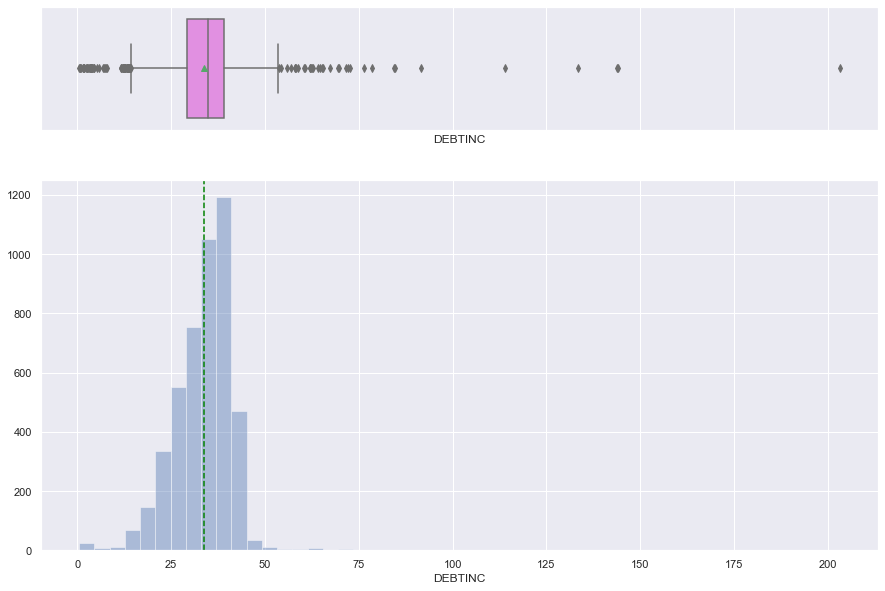

In [29]:
NumList = ['MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
for i in range(9):
    histogram_boxplot(data[NumList[i]])

**Insights**
- 'MORTDUE','VALUE' has many outliers on the right side and the distribution is right skewed
- 'YOJ' does not seem to be a normally distributed. Many clients have zero YOJ. The distribution is roughly downward sloping. There are some outliers on the right side, the distribution is heavyly right skewed.
- 'DEROG', 'DELINQ' are not continuous. Majority of clients have zero for these two columns the rest are all outliers. The distribution is skewed to the right
- 'CLAGE' is right skewed with two outliers that are extremely far away above 75 percentile, we need to take out these two outliers.
- 'NINQ' is not continuous and also right skewed with a few outliers on the right, we need to remove these outleirs from analysis
- 'CLNO' has some outliers on the right and we remove them
- 'DEBTINC' has outleirs on both sides, and it is roughly left skewed

### **2. Univariate Analysis - Categorical Data**

In [30]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
        
    plt.show() # show the plot

#### Analyze Barplot for DELINQ

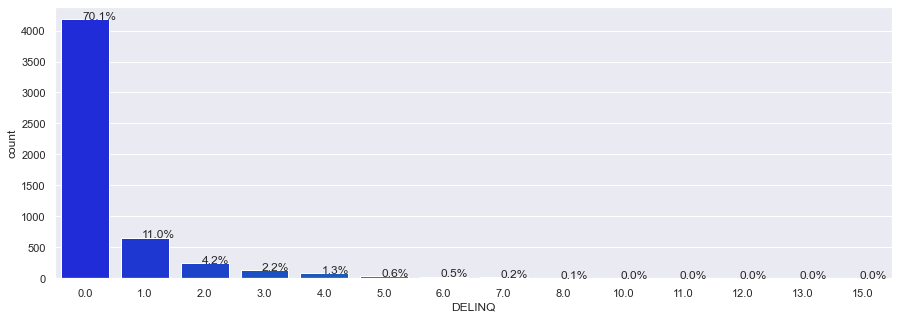

In [31]:
#Build barplot for DELINQ

plt.figure(figsize=(15,5))
ax = sns.countplot(data["DELINQ"],palette='winter')
perc_on_bar(ax,data["DELINQ"])

**Insights**
- ~70% of the DELINQ value is 0, meaning no delinquent credit line exists for most clients.
- Around 11% of people have 1 delinquent account

#### Barplot is Great to Analyze Discrete Variables - DELINQ, DEROG, NINQ

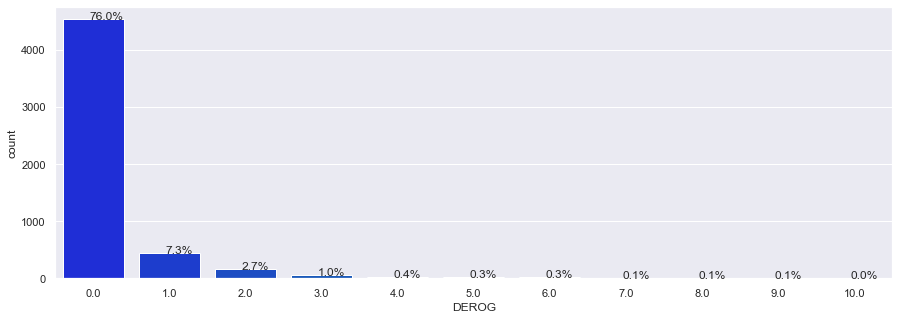

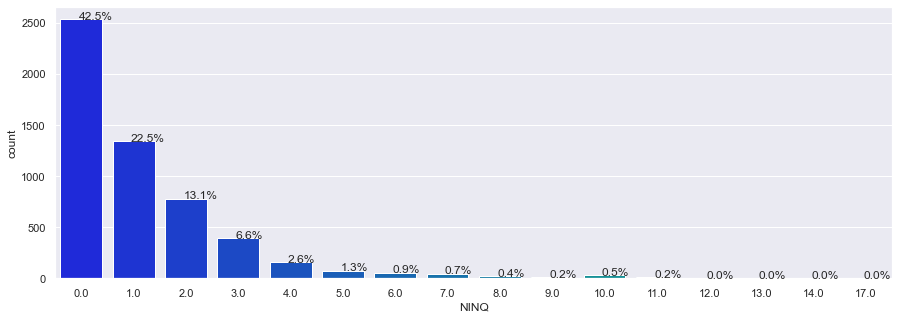

In [32]:
list = ['DEROG', 'NINQ']
for i in list:
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[i],palette='winter')
    perc_on_bar(ax,data[i])

**Insights**
- ~76% of the DEROG value is 0, meaning no derogatory reports exists for most clients.
- Around 42.5% of the NINQ is 0, 22.5% is 1, and 13.1% is 2, meaning most people have fewer than 2 credit inquiries recently.

## **Bivariate Analysis**

### **Bivariate Analysis: Continuous and Categorical Variables**
#### Analyze BAD vs Loan

<AxesSubplot:xlabel='BAD', ylabel='LOAN'>

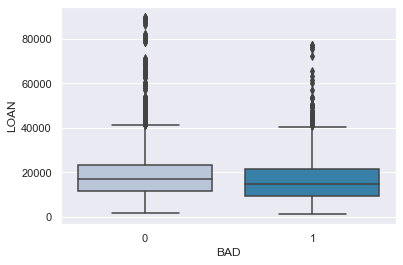

In [33]:
sns.boxplot(data["BAD"],data['LOAN'],palette="PuBu")

**Insights**
- The range of loan for non-default loan is larger than defaulted loan.
- The average loan amount for non-default loan is higher than defaulted loan.
- Overall loan amount for non-default loan is more than defaulted, shown by the 25 and 75 percentile
- Most loan are below 40000 for both default and non-defaulted loan

#### **Note:** As shown above, perform Bi-Variate Analysis on different pair of Categorical and continuous variables

#### Analyze BAD vs DEROG vs DELINQ

Text(0.5, 1.0, 'BAD vs DELINQ')

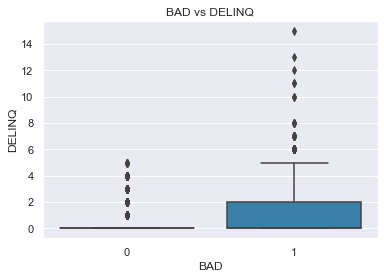

In [34]:
sns.boxplot(data["BAD"],data['DELINQ'],palette="PuBu")
plt.title('BAD vs DELINQ')

Text(0.5, 1.0, 'BAD vs DEROG')

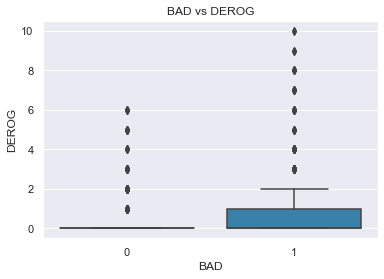

In [35]:
sns.boxplot(data["BAD"],data['DEROG'],palette="PuBu")
plt.title('BAD vs DEROG')

<AxesSubplot:xlabel='DELINQ', ylabel='DEROG'>

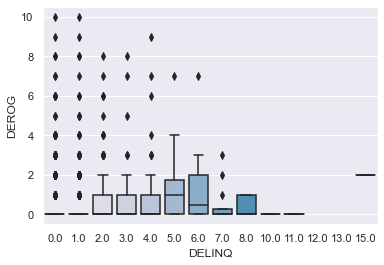

In [36]:
#High Delinq also associate with high Derog. (0-1 delinq all derog > 0 are outliers)
sns.boxplot(data['DELINQ'],data['DEROG'],palette="PuBu")

**Insights**
- A few outliers do not default on loan but have high amount of delinquency credit lines or derogatory reports
- Default loan have a high tendency to associate with people who have high amount of delinquency credit lines or derogatory reports
- People who have high delinquency credit lines are also likely to have derogatory reports

### **Bivariate Analysis: Two Continuous Variables**

<AxesSubplot:xlabel='BAD', ylabel='YOJ'>

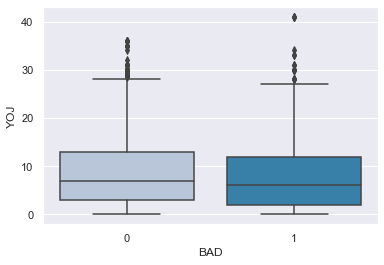

In [37]:
sns.boxplot(data['BAD'],data['YOJ'],palette="PuBu")

**Insights:**
- people who do not default on their loan tend to have higher years of working experience
- There are some outliers who have very high years of experience still default on their loan

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of continuous variables

#### Analyze BAD vs CLAGE

<AxesSubplot:xlabel='BAD', ylabel='CLAGE'>

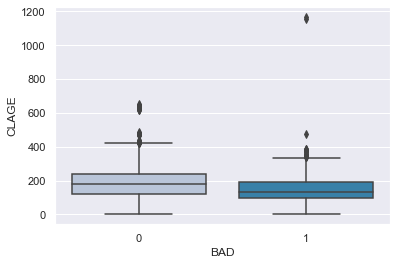

In [38]:
sns.boxplot(data['BAD'],data['CLAGE'],palette="PuBu")

**Insights**
- People who default tend to have lower age of credit history. However there are some outliers that have very high credit history but still default.

#### Analyze BAD vs DEBTINC

<AxesSubplot:xlabel='BAD', ylabel='DEBTINC'>

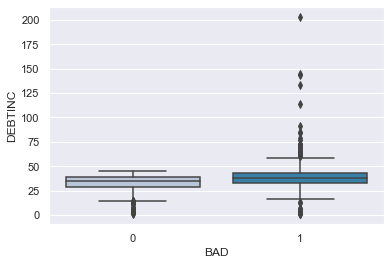

In [39]:
sns.boxplot(data['BAD'],data['DEBTINC'],palette="PuBu")

**Insights**
- People who default tend to have higher Debt to income ratio, with some outliers that have extremely high (>100) debt to income ratio.

#### Analyze BAD vs CLNO

<AxesSubplot:xlabel='BAD', ylabel='CLNO'>

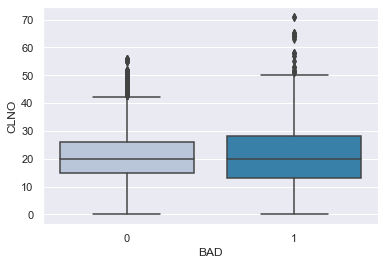

In [40]:
sns.boxplot(data['BAD'],data['CLNO'],palette="PuBu")

**Insights**
- People who default have similar median number of existing credit. However, the 75 percentile and outliers shows that default people tend to have higher extreme value of existing credit than non-default people.

### **Bivariate Analysis:  BAD vs Categorical Variables**

**The stacked bar chart (aka stacked bar graph)** extends the standard bar chart from looking at numeric values across one categorical variable to two.

In [41]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='rocket_r')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

#### Plot stacked bar plot for for LOAN and REASON

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


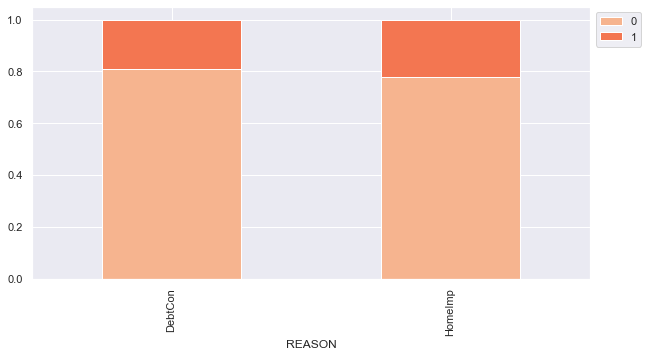

In [42]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['REASON'])

**Insights**
- around 18% people with debt consolidation default on loan, around 22% people with home improvement default on loan
- People who has home improvement are more likely to default than debt consolidation

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of Categorical vs BAD

BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
------------------------------------------------------------------------------------------------------------------------


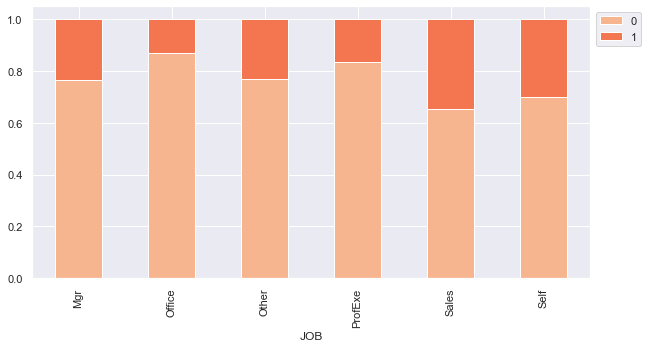

In [43]:
# Plot stacked bar plot for BAD and JOB
stacked_plot(data['JOB'])

**Insights**
- People who has a job of Sales are most likely to default; People who are self employeed are also likely to default.
- However, since the sample size for sales and self are very low, we need to utilize other methods to support our thesis
- People who work in office are least likely to default

### **Multivariate Analysis**

#### Analyze Correlation Heatmap for Numerical Variables

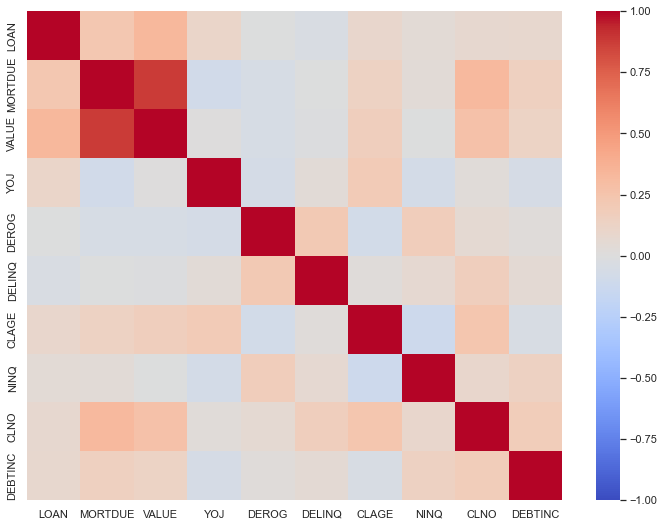

In [44]:
# Separating numerical variables
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

# Build correlation matrix for numerical columns
corr = data[numerical_col].corr()

# plot the heatmap
plt.figure(figsize=(12,9))
sns.heatmap(corr,cmap='coolwarm',vmax=1,vmin=-1,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns);

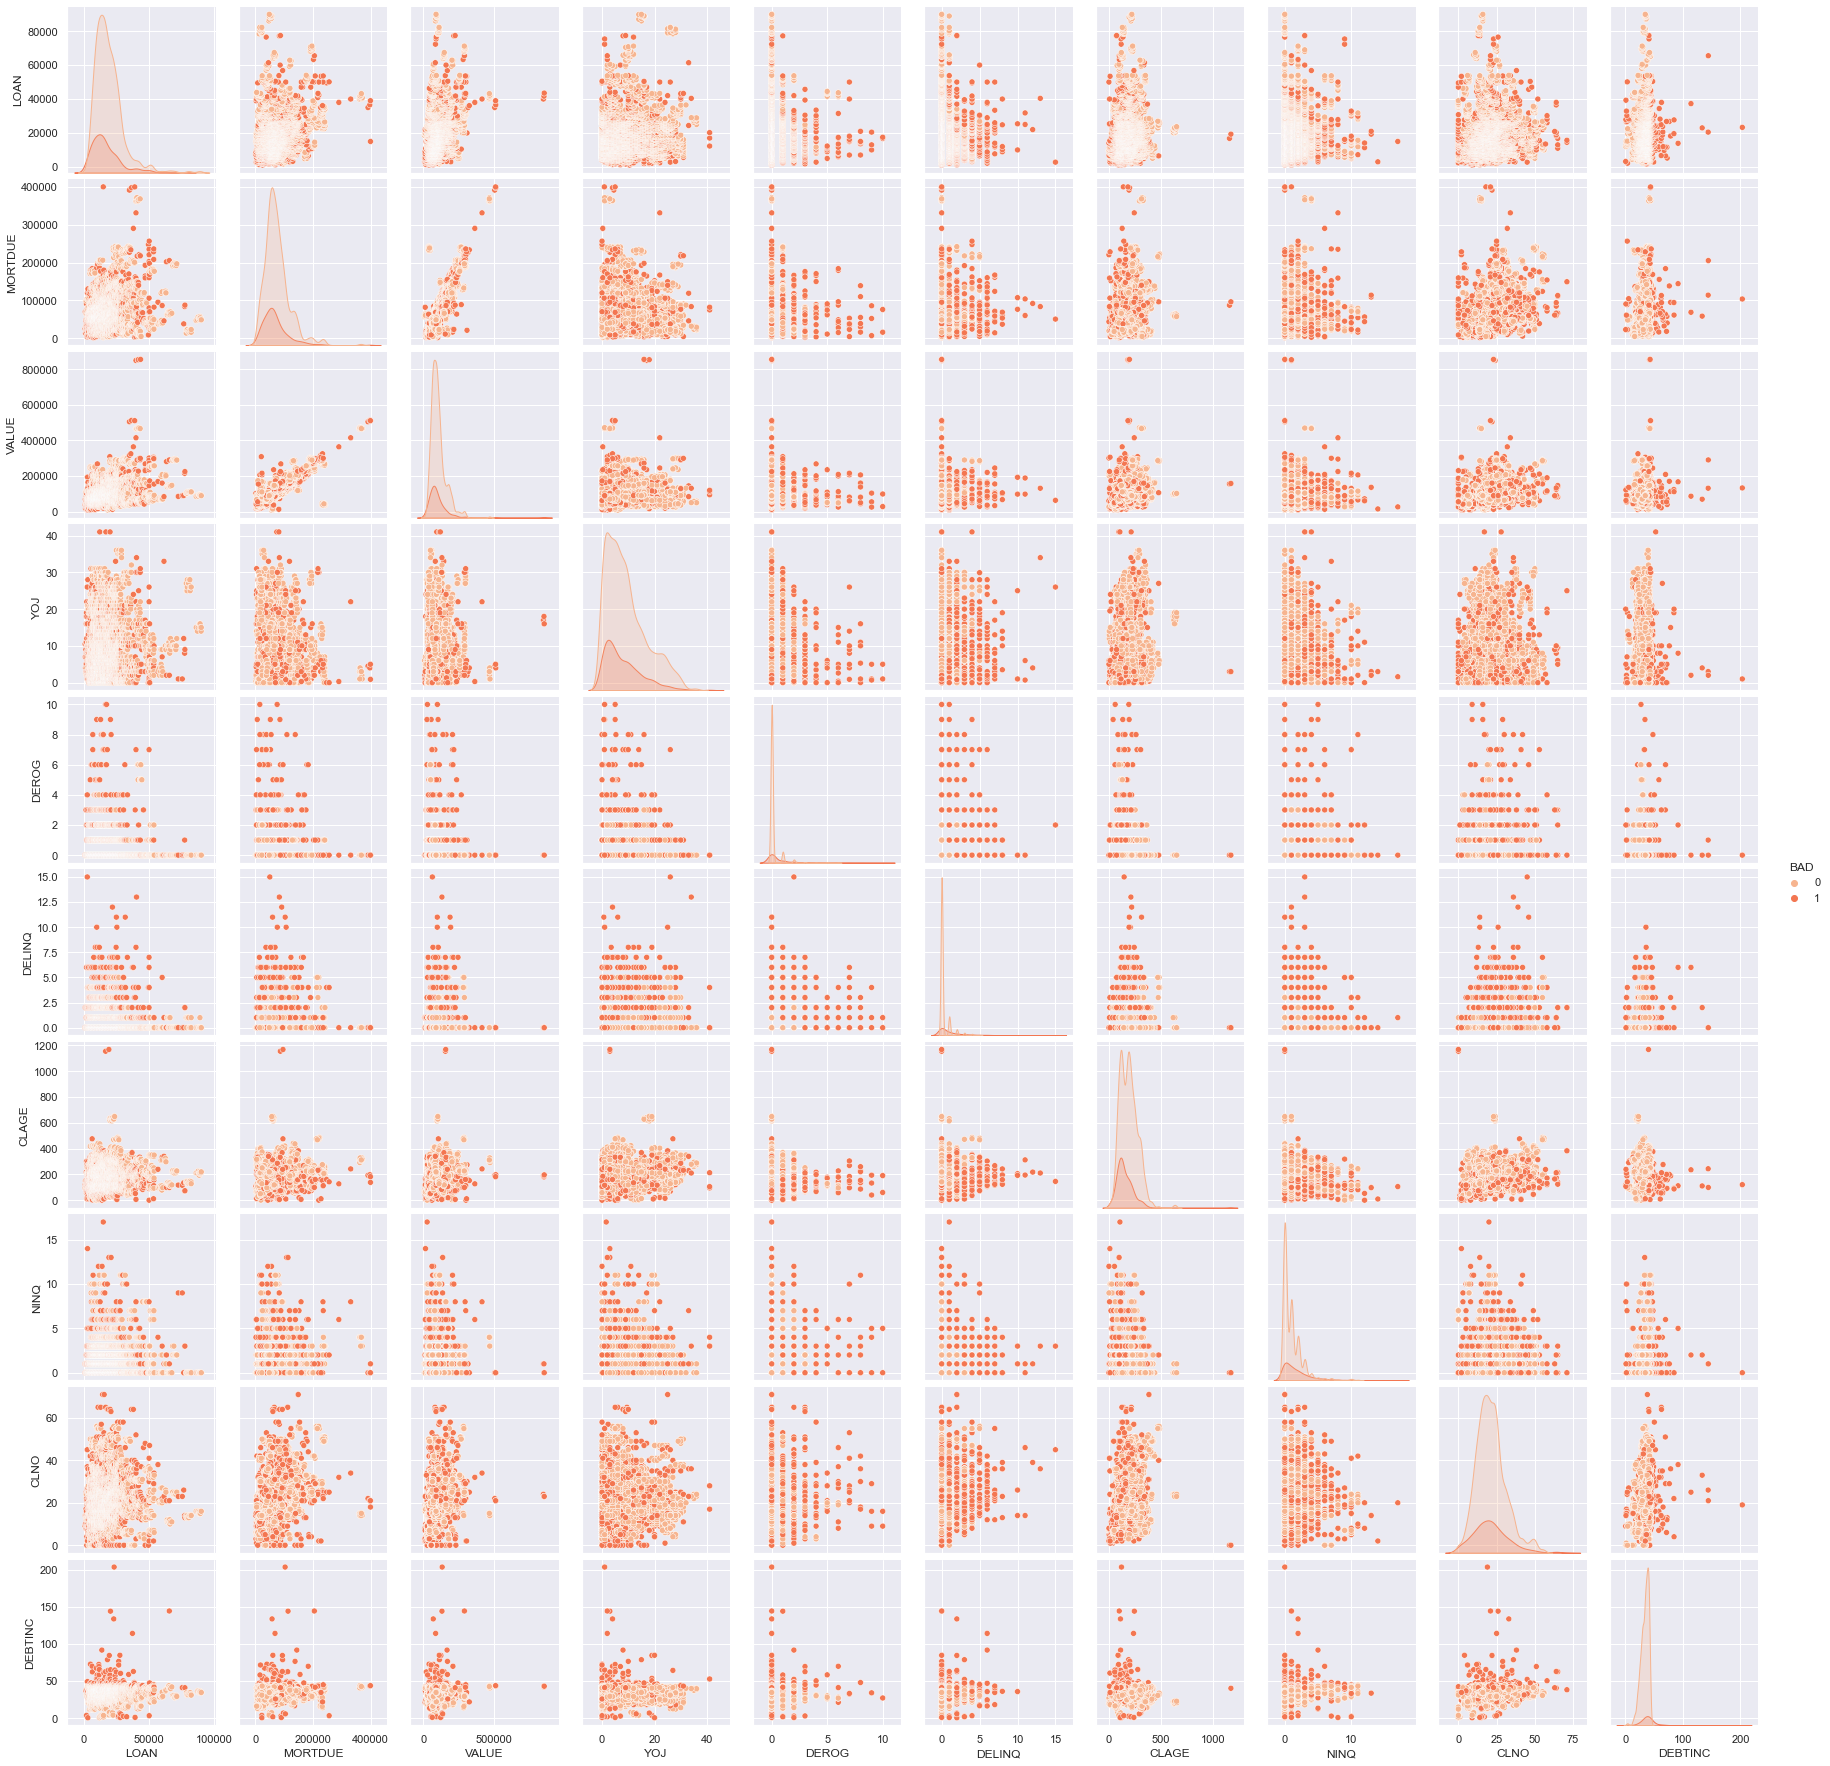

In [45]:
# Build pairplot for the data with hue = 'BAD'
sns.pairplot(data,hue='BAD')

### **Think about it**

- Most data in Derog and Delinq are zero and any value greater than zero are outliers. However, these outliers are very important for out analysis, dropping them will lead to important information loss and therefore not recommend to treat outliers.


- Two datasets will be compared in the modeling stages. Both will have missing values treated but one with binary flag for missing values while the other unflagged.  

#### Treating Outliers

In [46]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1   # IQR Range
    Lower_Whisker = Q1 - 1.5*IQR  #define lower whisker
    Upper_Whisker = Q3 + 1.5*IQR  # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) 
    # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
    # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df

In [47]:
df_flag = data.copy()

numerical_col = df_flag.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

#outliers will be kept to keep important information
#df_flag = treat_outliers_all(df_raw,numerical_col)

#### Adding new columns in the dataset for each column which has missing values 

In [50]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0. 
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [52]:
# list of columns that has missing values in it
missing_col = [col for col in df_flag.columns if df_flag[col].isnull().any()]

for column in missing_col:
    add_binary_flag(df_flag,column)

#### Filling missing values in numerical columns with median and mode in categorical variables

In [53]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = df_flag.select_dtypes('number')

# Select string and object columns.
cat_data = df_flag.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.
df_flag[num_data.columns] = num_data.fillna(df_flag[num_data.columns].median())

# Fill object columns with mode.
for column in cat_data:
    mode = df_flag[column].mode()[0]
    df_flag[column] = df_flag[column].fillna(mode)

In [54]:
df_flag.head(10)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,...,VALUE_missing_values_flag,REASON_missing_values_flag,JOB_missing_values_flag,YOJ_missing_values_flag,DEROG_missing_values_flag,DELINQ_missing_values_flag,CLAGE_missing_values_flag,NINQ_missing_values_flag,CLNO_missing_values_flag,DEBTINC_missing_values_flag
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,...,False,False,False,False,False,False,False,False,False,True
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,...,False,False,False,False,False,False,False,False,False,True
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,...,False,False,False,False,False,False,False,False,False,True
3,1,1500,65019.0,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,...,True,True,True,True,True,True,True,True,True,True
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,...,False,False,False,False,False,False,False,False,False,True
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,...,False,False,False,False,False,False,False,False,False,False
6,1,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,...,False,False,False,False,False,False,False,False,False,True
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,...,False,False,False,False,False,False,False,False,False,False
8,1,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,...,False,False,False,False,False,False,False,False,False,True
9,1,2000,65019.0,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,...,False,False,False,False,False,False,False,False,False,True


In [55]:
df_flag.isnull().sum()

BAD                            0
LOAN                           0
MORTDUE                        0
VALUE                          0
REASON                         0
JOB                            0
YOJ                            0
DEROG                          0
DELINQ                         0
CLAGE                          0
NINQ                           0
CLNO                           0
DEBTINC                        0
MORTDUE_missing_values_flag    0
VALUE_missing_values_flag      0
REASON_missing_values_flag     0
JOB_missing_values_flag        0
YOJ_missing_values_flag        0
DEROG_missing_values_flag      0
DELINQ_missing_values_flag     0
CLAGE_missing_values_flag      0
NINQ_missing_values_flag       0
CLNO_missing_values_flag       0
DEBTINC_missing_values_flag    0
dtype: int64

In [58]:
#df_flag.to_csv('data_cleaned_flag.csv',index=False)

### Export None Binary Flag Dataset

In [61]:
df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

#outliers will be kept to keep important information
#df_flag = treat_outliers_all(df_raw,numerical_col)

# # list of columns that has missing values in it
# missing_col = [col for col in df_raw.columns if df_raw[col].isnull().any()]


# Binary Flag will not be added
# for column in missing_col:
#     add_binary_flag(df_raw,column)


#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = df_raw.select_dtypes('number')

# Select string and object columns.
cat_data = df_raw.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.
df_raw[num_data.columns] = num_data.fillna(df_raw[num_data.columns].median())

# Fill object columns with mode.
for column in cat_data:
    mode = df_raw[column].mode()[0]
    df_raw[column] = df_raw[column].fillna(mode)

In [62]:
df_raw.head(10)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262
3,1,1500,65019.0,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
6,1,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,1.0,17.0,34.818262
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
8,1,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,1.0,12.0,34.818262
9,1,2000,65019.0,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,34.818262


In [63]:
df_raw.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [64]:
#df_raw.to_csv('data_cleaned_noflag.csv',index=False)

## **Proposed approach**
**1. Potential techniques** - What different techniques should be explored?
- Model - Decision Tree, Random Forest, logistic regression, Support Vector Machine, KNN. These are popular classification machine learning models.
- We will use train-test split or k-fold cross-validation to train & test our model and find the best hyperparameters.
- We can also use PCA and TSNE to reduce dimension of our data and identify the most significant features. However, since we only have 10 columns, it is not really necessary to use PCA

**2. Overall solution design** - What is the potential solution design?
- The data is fully-prepared for modeling. We will first split the dataset to train and test set(20% Test, 80% Train) or use k-fold to split into multiple train-test sets.
- We then train different models on the training set, check the evaluation matrix of our models on training data and testing data, and determine which measurement to maximize.
- We will then tune the models using gridsearch method under different hyperparameters to find the best working model.
- Finally, we will run the model and check the most important features
- We will then evaluate these features to see if they are reasonable, and recommend our model and features to management team.

**3. Measures of success** - What are the key measures of success?
- We can use model evaluation methods like confusion matrix, jaccard_score, precision, recall, f1-score to measure our success.
- We can also investigate features importance to make sure the top features we find are reasonable.

## **Model Building - Approach**
1. Data preparation - Exclude Outliers and Binary Flags
2. Partition the data into train and test set
3. Fit on the train data
4. Tune the model and prune the tree, if required
5. Test the model on test set

## **Import Cleaned Flag and Unflagged Data**

In [68]:
hm_flag = pd.read_csv("data_cleaned_flag.csv")
hm_flag.head(10)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,...,VALUE_missing_values_flag,REASON_missing_values_flag,JOB_missing_values_flag,YOJ_missing_values_flag,DEROG_missing_values_flag,DELINQ_missing_values_flag,CLAGE_missing_values_flag,NINQ_missing_values_flag,CLNO_missing_values_flag,DEBTINC_missing_values_flag
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,...,False,False,False,False,False,False,False,False,False,True
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,...,False,False,False,False,False,False,False,False,False,True
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,...,False,False,False,False,False,False,False,False,False,True
3,1,1500,65019.0,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,...,True,True,True,True,True,True,True,True,True,True
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,...,False,False,False,False,False,False,False,False,False,True
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,...,False,False,False,False,False,False,False,False,False,False
6,1,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,...,False,False,False,False,False,False,False,False,False,True
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,...,False,False,False,False,False,False,False,False,False,False
8,1,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,...,False,False,False,False,False,False,False,False,False,True
9,1,2000,65019.0,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,...,False,False,False,False,False,False,False,False,False,True


In [69]:
hm_noflag = pd.read_csv("data_cleaned_noflag.csv")
hm_noflag.head(10)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262
3,1,1500,65019.0,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
6,1,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,1.0,17.0,34.818262
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
8,1,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,1.0,12.0,34.818262
9,1,2000,65019.0,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,34.818262


In [70]:
data_flag = hm_flag.copy()
data_noflag = hm_noflag.copy()

# Flagged Data Modeling
## **Data Preparation**
### **Separating the target variable from other variables**

In [175]:
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix
X = data_flag.drop(columns = 'BAD')

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
X = pd.get_dummies(X, drop_first = True)

# Create y(dependent varibale)
y = data_flag['BAD']

In [176]:
X.head(5)

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,...,CLAGE_missing_values_flag,NINQ_missing_values_flag,CLNO_missing_values_flag,DEBTINC_missing_values_flag,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262,...,False,False,False,True,1,0,1,0,0,0
1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262,...,False,False,False,True,1,0,1,0,0,0
2,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262,...,False,False,False,True,1,0,1,0,0,0
3,1500,65019.0,89235.5,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262,...,True,True,True,True,0,0,1,0,0,0
4,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262,...,False,False,False,True,1,1,0,0,0,0


### **Splitting the data into 70% train and 30% test set**

In [177]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

### **Think about it** 
- You can try different splits like 70:30 or 80:20 as per your choice. Does this change in split affect the performance?
- If the data is imbalanced, can you make the split more balanced and if yes, how?

1. Split with too much training set may lead to overfitting of model and cause the model trained to be not very effective. Vice versa, too little training set can lead to underfitting.


2. Resample techniques like Under-sampling abundant class or over-sampling insufficient data are needed to deal with imbalance data. Oversampling techniques includes repetition, bootstrapping or SMOTE (Synthetic Minority Over-Sampling Technique).

### Evaluation for Flagged Dataset

## **Model Evaluation Criterion**
#### After understanding the problem statement, think about which evaluation metrics to consider and why. 

In [71]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Build a Simple Logistic Regression Model** 

In [178]:
# Defining the Logistic regression model
lr = LogisticRegression(penalty = 'none')

# Fitting the model on the training data 
lr.fit(X_train, y_train)

LogisticRegression(penalty='none')

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      3355
           1       0.74      0.04      0.07       817

    accuracy                           0.81      4172
   macro avg       0.78      0.52      0.48      4172
weighted avg       0.80      0.81      0.73      4172



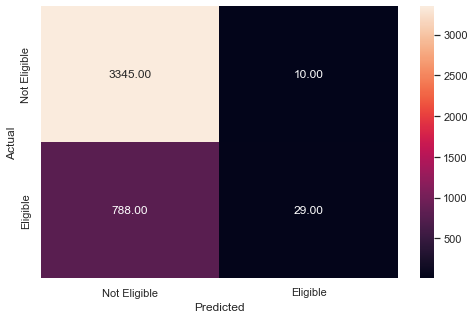

In [179]:
#Predict for train set
train_pred = lr.predict(X_train)

#checking the performance on the train dataset
metrics_score(y_train, train_pred) 

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1416
           1       0.50      0.01      0.02       372

    accuracy                           0.79      1788
   macro avg       0.65      0.50      0.45      1788
weighted avg       0.73      0.79      0.70      1788



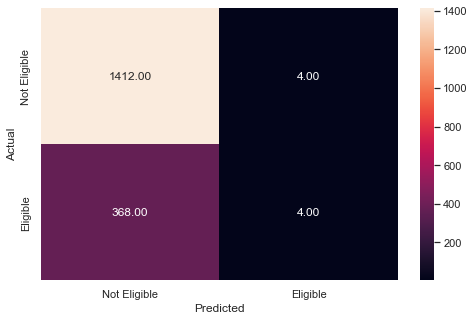

Score for Train DataSet
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      3355
           1       0.74      0.04      0.07       817

    accuracy                           0.81      4172
   macro avg       0.78      0.52      0.48      4172
weighted avg       0.80      0.81      0.73      4172



In [180]:
#Predict for test set
test_pred = lr.predict(X_test)

#checking the performance on the test dataset
metrics_score(y_test, test_pred)
print("Score for Train DataSet\n", classification_report(y_train, train_pred))

### **Standardize the Data for regularized Model** 

In [181]:
#For regularized Regression, we have to Standardize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
# X_scaled=(X - X.mean()) / X.std()
X1_train, X1_test, y1_train, y1_test = train_test_split(X_scaled, y, test_size = 0.30, random_state = 1)

### **Build a Lasso Logistic Regression Model**

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      3355
           1       0.78      0.63      0.70       817

    accuracy                           0.89      4172
   macro avg       0.85      0.79      0.82      4172
weighted avg       0.89      0.89      0.89      4172



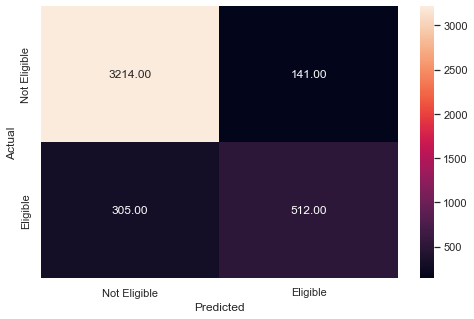

In [182]:
#l1 regularized regression
lrl1 = LogisticRegression(penalty="l1",solver="liblinear")
lrl1.fit(X1_train, y1_train)
train_pred = lrl1.predict(X1_train)

#checking the performance on the train dataset
metrics_score(y1_train, train_pred)  

- From the confusion matrix and evaluation scores, we can see that logistic regression with l1 regularization avoid overfitting (recall < 1) while having a higher precision than no-penalty regression(No. of true positives divided by total positive predictions)


- Recall shows the proportion of actual value correctedly predicted by our model. If recall is equal to 1, then our model correctedly predict all the actual y_train value which may indicate overfitting.

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1416
           1       0.82      0.62      0.70       372

    accuracy                           0.89      1788
   macro avg       0.86      0.79      0.82      1788
weighted avg       0.89      0.89      0.89      1788



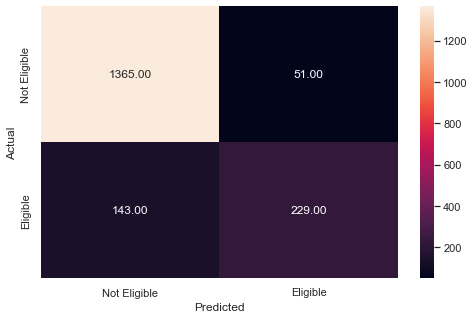

Score for Train DataSet
               precision    recall  f1-score   support

           0       0.91      0.96      0.94      3355
           1       0.78      0.63      0.70       817

    accuracy                           0.89      4172
   macro avg       0.85      0.79      0.82      4172
weighted avg       0.89      0.89      0.89      4172



In [183]:
#Predict for test set
test_pred = lrl1.predict(X1_test)

#checking the performance on the test dataset
metrics_score(y1_test, test_pred)
print("Score for Train DataSet\n", classification_report(y1_train, train_pred))

**Observations: __________**
- The recall for simple logistic regression is very low, only 0.01.


- Both lasso and ridge achieve a recall of 0.62, indicating 62% of actual eligible clients are predicted by the model.


- The precision for ridge suggests that there's a 18% (1 - 0.82) chance that the model will predict that a person is not eligible but turn out to be eligible, and the company may waste their time and energy on these people who are not going to be converted.


- The precision answer the question "What proportion of positive identifications was actually correct?". The recall answer the question "What proportion of actual positives was identified correctly?" In this case, 82% of predicted converted is actually correct.

#### Check the coefficients, and check which variables are important and how they affect the process of loan approval

In [184]:
# Printing the coefficients of regularized logistic regression
print("Coefficients:\n",lrl1.coef_)

coef_abs = np.abs(lrl1.coef_)
max_coefs = np.max(coef_abs,axis=0)
features=np.argpartition(max_coefs, -8)[-8:]

print("\nTop 8 Features:",[i for i in X.columns[features]])
print("Top 8 Features' Coefficient:",[round(i,3) for i in lrm.coef_[0][features]])

Coefficients:
 [[-0.0431454  -0.09257106  0.12245706 -0.0998626   0.45158182  0.85012793
  -0.41429894  0.2241605  -0.12899444  0.8188303   0.04390231  0.64510569
  -0.02004077 -0.45975034 -0.17813116 -0.66760051 -0.04142873  0.23502558
  -0.1376599   0.56540718  1.11224131  0.05692947 -0.23605307  0.01266454
  -0.10827166  0.16587508  0.0212446 ]]

Top 8 Features: ['DEROG', 'CLNO_missing_values_flag', 'JOB_missing_values_flag', 'VALUE_missing_values_flag', 'DEROG_missing_values_flag', 'DEBTINC_missing_values_flag', 'DEBTINC', 'DELINQ']
Top 8 Features' Coefficient: [0.455, 0.579, -0.465, 0.65, -0.668, 1.11, 0.817, 0.851]


**Insights**
- Most Important Varialbes are: 'DEROG', 'CLNO_missing_values_flag', 'JOB_missing_values_flag', 'VALUE_missing_values_flag', 'DEROG_missing_values_flag', 'DEBTINC_missing_values_flag', 'DEBTINC', 'DELINQ'.

### **Think about it:**
- The above Logistic regression model was build on the threshold of 0.5, can we use different threshold?
- How to get an optimal threshold and which curve will help you achieve?
- How does, accuracy, precision and recall change on the threshold?

- Yes the recall for score 1 is much lower than 0, showing strong imbalance of dataset


- ROC (Receiver Operating Characteristic) curve will help us acheive the best threshold. The optimal threshold is achieved when 𝑇𝑃𝑅, True Positive Rate, minus 𝐹𝑃𝑅, False Positive Rate, is maximized. Use fpr, tpr, thresholds = roc_curve(y, y_scores) to find the fpr and tpr 


- Another way is to use Recall and Precision plot and find the threshold level that gives optimum F1 score

- There is an inverse relationship between precision and recall

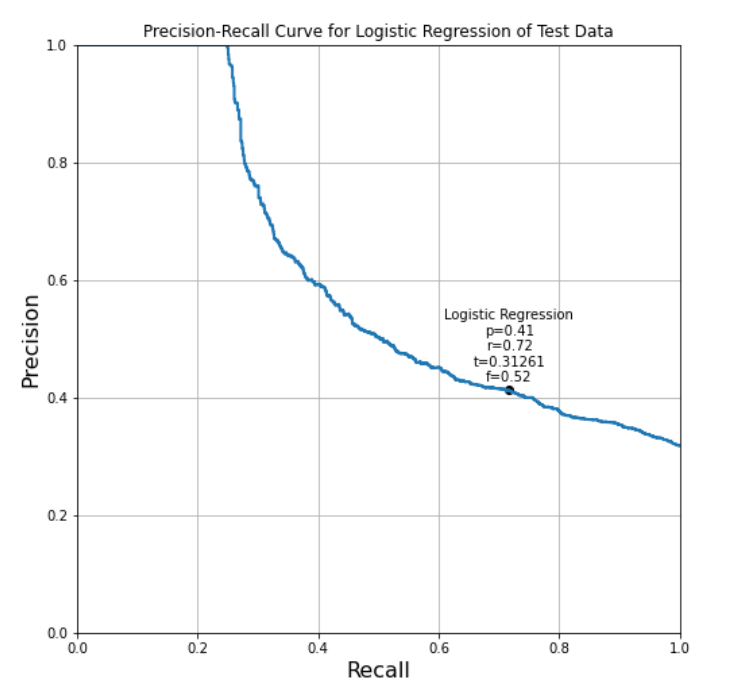

### **Build a Decision Tree Model**
### **Think about it:**
- In Logistic regression we treated the outliers and built the model, should we do the same for tree based models or not? If not, why?
- We will not treat outliers as Derog and Delinq are important features but non-zero values for these variables are outliers, so we should not drop them.

In [185]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}
d_tree =  DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8})
#fitting Decision tree model
d_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8})

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



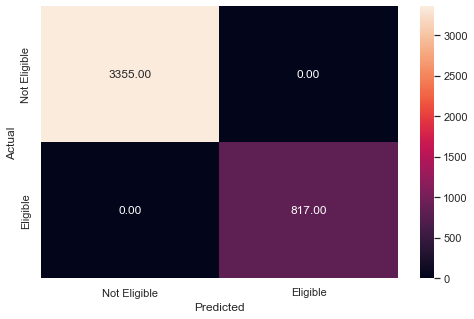

In [186]:
# Checking performance on the training data
y_pred_train = d_tree.predict(X_train)

metrics_score(y_train, y_pred_train)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1416
           1       0.70      0.62      0.66       372

    accuracy                           0.87      1788
   macro avg       0.80      0.77      0.79      1788
weighted avg       0.86      0.87      0.86      1788



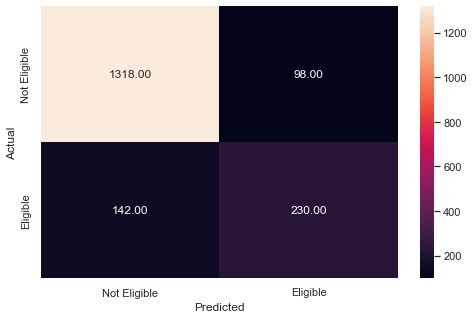

In [187]:
# Checking performance on the testing data
y_pred_test = d_tree.predict(X_test)

metrics_score(y_test, y_pred_test)

**Insights**
- The Decision Tree works so well on the training data that recall and precision are all 1. However, it performs not so well on the test data as the recall is 0.62 in comparison to 1 for the training dataset. Therefore, the Decision Tree is overfitting the training data.


- The precision on the test data suggests there's a 30% (1 - 0.7) chance that the model will predict that a person is going to be eligible but turn out to be not


- Only 70% of predicted eligible is actually correct. Also, the model only identify correctly 61% of actual eligible clients.

### **Think about it:**
- Can we improve this model? - Hyperparameter tuning and use data excluding the missing-value-flags 
- How to get optimal parameters in order to get the best possible results? - Gridsearch

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them. 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


#### Using GridSearchCV for Hyperparameter tuning on the model

In [188]:
# Choose the type of classifier. 
d_tree_tuned = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state= 5)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(10, 20), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': np.arange(10, 30)
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

# Fit the GridSearch on train dataset
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       max_depth=12, min_samples_leaf=28, random_state=5)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      3355
           1       0.60      0.88      0.72       817

    accuracy                           0.86      4172
   macro avg       0.79      0.87      0.81      4172
weighted avg       0.90      0.86      0.87      4172



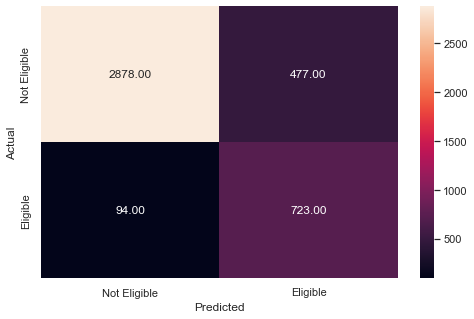

In [189]:
# Checking performance on the training data based on the tuned model
y_pred_train2 = d_tree_tuned.predict(X_train)

metrics_score(y_train, y_pred_train2)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      1416
           1       0.58      0.78      0.67       372

    accuracy                           0.84      1788
   macro avg       0.76      0.82      0.78      1788
weighted avg       0.86      0.84      0.85      1788



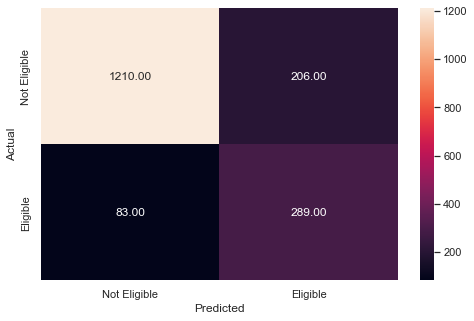

Report of Model_1 is 
               precision    recall  f1-score   support

           0       0.90      0.93      0.92      1416
           1       0.70      0.62      0.66       372

    accuracy                           0.87      1788
   macro avg       0.80      0.77      0.79      1788
weighted avg       0.86      0.87      0.86      1788



In [190]:
# Checking performance on the testing data based on the tuned model
y_pred_test2 = d_tree_tuned.predict(X_test)

metrics_score(y_test, y_pred_test2)
print("Report of Model_1 is \n", classification_report(y_test, y_pred_test))

**Insights**
- Compared to Model_1, tuned model has a higher recall on model_1 and lower precision, f1 score is similar. This model is not overfitting the training data and giving approximately the same result on the test and train datasets. Recall is 0.78 for test vs 0.88 for train. The model also has a much higher recall than the model_1. However, the model perform worse on precision with only 58% of Eligible prediction correct.


- This shows that the tuned model capture 78% of eligible clients while predicting some non-eligible clients as eligible. Given that the bank want as few default clients as possible, recall, the fraction of relevant instances that were predicted by model, needs to be as high as possible. A model with high recall, despite lower precision allows the bank to holistically capture as many risky clients as possible, sacrificing the loss of some non-default clients.

#### Plotting the Decision Tree

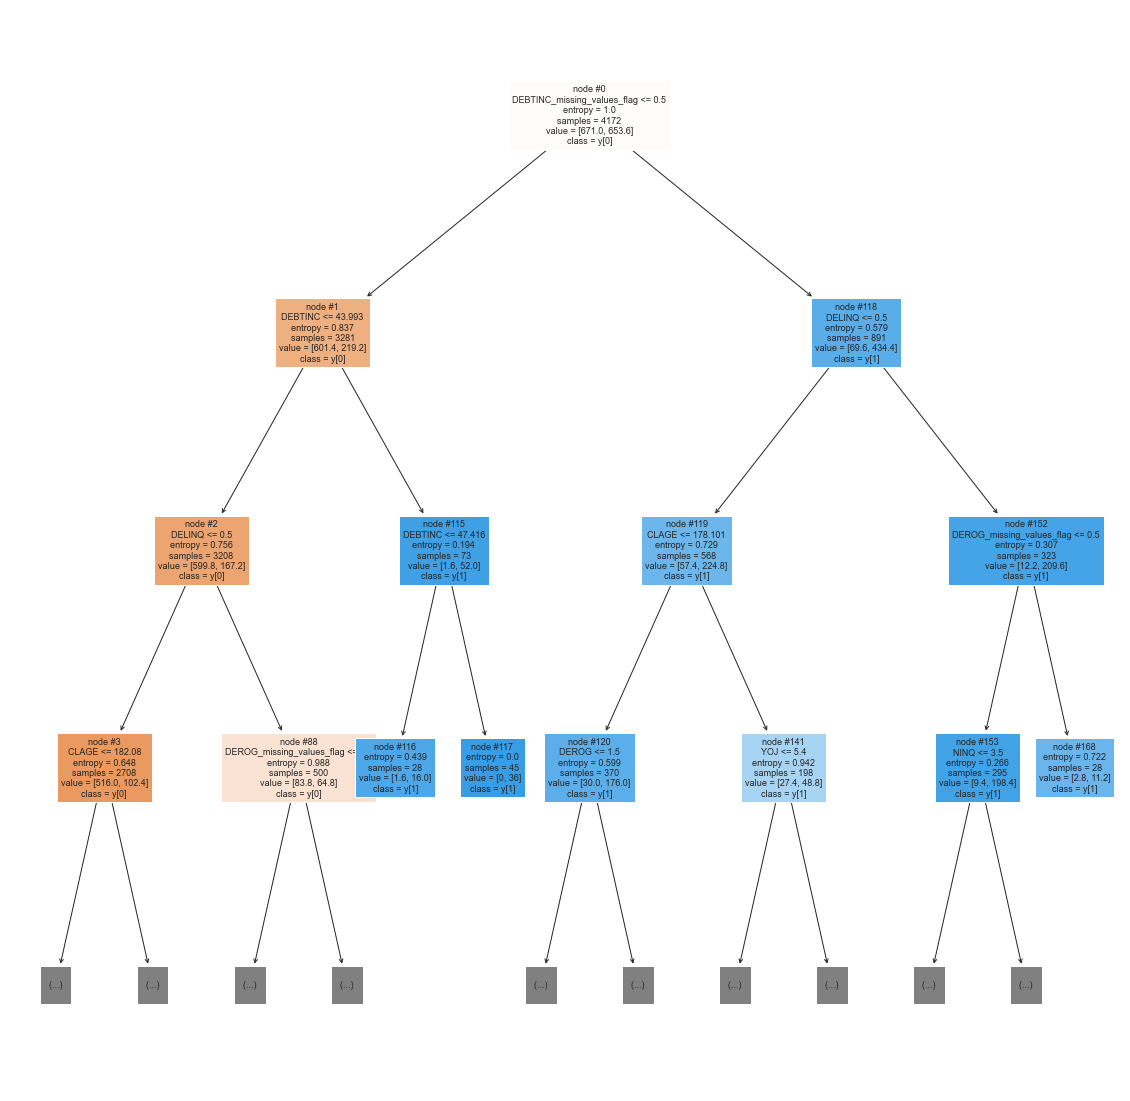

In [191]:
# Plot the decision tree and analyze it to build the decision rule
features = X.columns

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True, max_depth = 3)

plt.show()

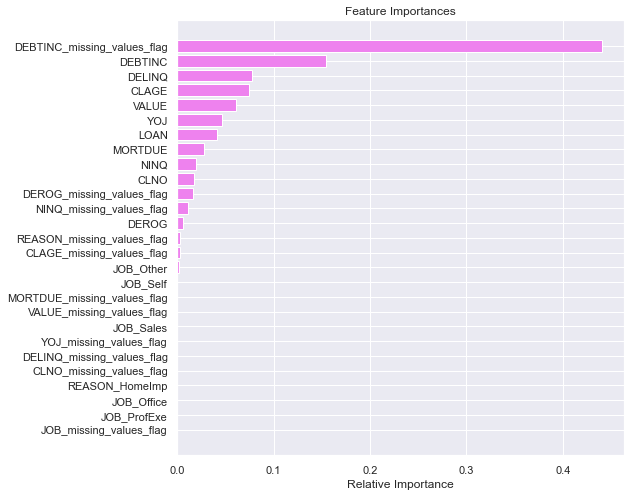

In [192]:
importances = d_tree_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = X.columns

plt.figure(figsize = (8, 8))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

#### Deduce the business rules apparent from the Decision Tree and write them down:
- **If clients do not disclose their Debt-to-Income ratio**, they are more likely to default


- **If clients have a Debt-to-income ratio < 44, no delinquent account, and have account age > 182 months**, they are less likely to default


- **If clients have more than 47 Debt-to-income ratio**, they are very likely to default


- **If clients do not disclose debt-to-income ratio, have more than one deliquent credit, and have more than 4 recent credit inquiry**, they are more likely to default

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [193]:
# Defining Random forest CLassifier
rf_estimator = RandomForestClassifier()

rf_estimator.fit(X_train, y_train)

RandomForestClassifier()

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



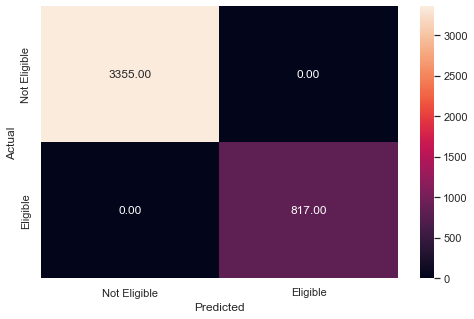

In [194]:
#Checking performance on the training data
y_pred_train3 = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train3)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1416
           1       0.86      0.71      0.78       372

    accuracy                           0.91      1788
   macro avg       0.89      0.84      0.86      1788
weighted avg       0.91      0.91      0.91      1788



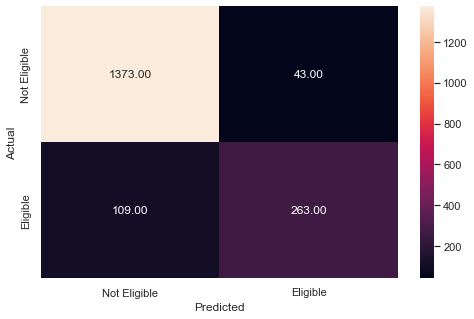

In [195]:
# Checking performance on the test data
y_pred_test3 = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test3)

**Observations:**
- The Random Forest classifier seems to be overfitting the training data. The recall on the training data is 1, while the recall on the test data is only ~ 0.7 for class 1.

- Precision is high for the test data than decision tree.

### **Build a Random Forest model with Class Weights**

In [196]:
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}
rf_estimator1 = RandomForestClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)

# Fitting Random Forest model
rf_estimator1.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



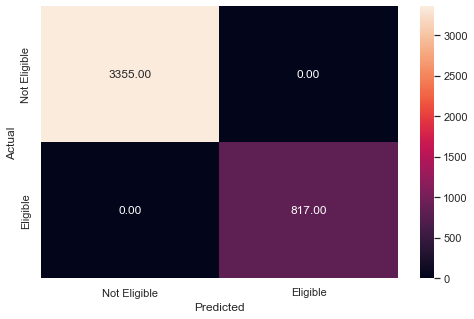

In [197]:
# Checking performance on the train data
y_pred_train4 = rf_estimator1.predict(X_train)

metrics_score(y_train, y_pred_train4)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1416
           1       0.86      0.67      0.75       372

    accuracy                           0.91      1788
   macro avg       0.89      0.82      0.85      1788
weighted avg       0.90      0.91      0.90      1788



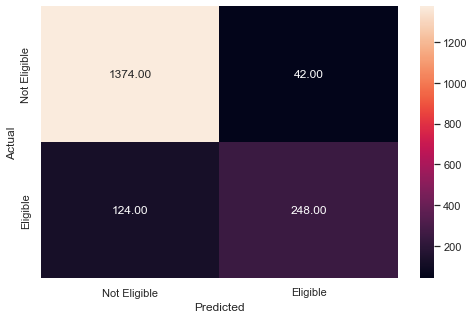

In [198]:
# Checking performance on the test data
y_pred_test4 = rf_estimator1.predict(X_test)

metrics_score(y_test, y_pred_test4)

### **Think about it:**
- Can we try different weights? - Yes we will use hyperparamter tuning
- If yes, should we increase or decrease class weights for different classes? - try through tuning

### **Tuning the Random Forest**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.


**n_estimators**: The number of trees in the forest.

**min_samples_split**: The minimum number of samples required to split an internal node:

**min_samples_leaf**: The minimum number of samples required to be at a leaf node. 

**max_features{“auto”, “sqrt”, “log2”, 'None'}**: The number of features to consider when looking for the best split.

- If “auto”, then max_features=sqrt(n_features).

- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

- If “log2”, then max_features=log2(n_features).

- If None, then max_features=n_features.

You can learn more about Random Forest Hyperparameters from the link given below and try to tune them

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

#### **Warning:** This may take a long time depending on the parameters you tune. 

In [199]:
# # Choose the type of classifier. 
# rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)


# # Grid of parameters to choose from
# parameters = {'class_weight': [{0: 0.5, 1: 0.5},{0: 0.3, 1: 0.7},{0: 0.2, 1: 0.8}],
#     "n_estimators": [90,100,105,110],
#     "max_depth": [3,4,5],
#     "max_features": [0.7,0.8,0.9],
#     "min_samples_leaf": [30,35,40]
#              }

# # Type of scoring used to compare parameter combinations
# scorer = metrics.make_scorer(recall_score, pos_label = 1)

# # Run the grid search
# grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

# #fit the GridSearch on train dataset
# grid_obj = grid_obj.fit(X_train, y_train)

# # Set the clf to the best combination of parameters
# rf_estimator_tuned = grid_obj.best_estimator_

In [200]:
rf_estimator_tuned = RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       max_depth=5, max_features=0.9, min_samples_leaf=40,
                       n_estimators=90, random_state=7)

In [201]:
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       max_depth=5, max_features=0.9, min_samples_leaf=40,
                       n_estimators=90, random_state=7)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.94      0.89      0.92      3355
           1       0.64      0.79      0.70       817

    accuracy                           0.87      4172
   macro avg       0.79      0.84      0.81      4172
weighted avg       0.88      0.87      0.88      4172



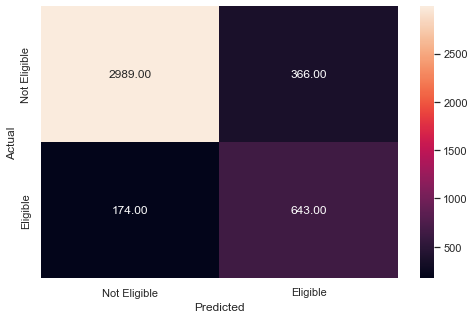

In [202]:
# Checking performance on the training data
y_pred_train5 = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train5)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      1416
           1       0.65      0.74      0.70       372

    accuracy                           0.86      1788
   macro avg       0.79      0.82      0.80      1788
weighted avg       0.87      0.86      0.87      1788



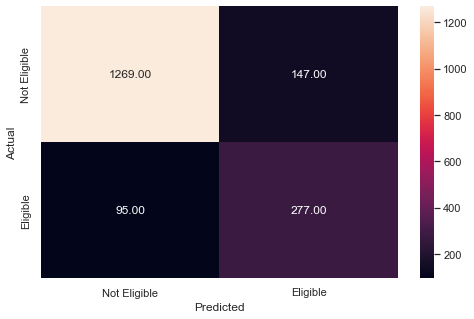

In [203]:
# Checking performace on test dataset
y_pred_test5 = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test5)

**Insights:**
- The tuned model reduce significantly the overfitting issue, and it has 0.74 recall.
- The model has a precision of 0.65 on test set
- overall accuracy is 0.65
- The Company want the recall to be maximized. The greater the Recall score, the higher the chances of minimizing False Negatives. The higher the chance that the company can capture as many risky clients as possible.
- Compared to decision tree model, random forest is less intepretable and cannot draw a tree like decision tree

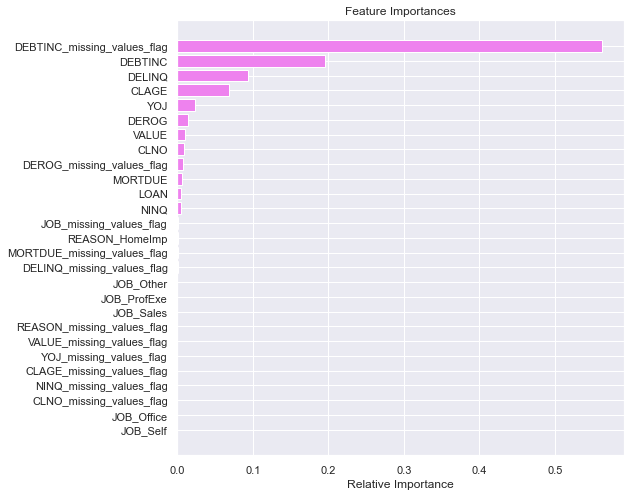

In [204]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Checking performace on test dataset
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = X.columns

plt.figure(figsize = (8, 8))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

## **Comparing Model Performances**

In [205]:
def get_recall_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [206]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [207]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [208]:
# Make the list of all the model names 

models = [lr,lrl1,d_tree,d_tree_tuned,rf_estimator,rf_estimator1,rf_estimator_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [209]:
# Mention the Model names in the list. for example 'Model': ['Decision Tree', 'Tuned Decision Tree'..... write tht names of all model built]

comparison_frame_flagged = pd.DataFrame({'Model':["LogisticRegression(No Penalty)","LogisticRegression('l1')",
                                          "DecisionTree","DecisionTree_Tuned","Random Forest(Default)","Random Forest(class_weight)",
                                          "Random Forest_Tuned"], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 

comparison_frame_flagged.iloc[0,[1,2,3,4,5,6]] = [0.81, 0.79, 0.04, 0.01, 0.74, 0.50]
comparison_frame_flagged.iloc[1,[1,2,3,4,5,6]] = [0.89, 0.89, 0.63, 0.62, 0.78, 0.82]
comparison_frame_flagged

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,LogisticRegression(No Penalty),0.810000,0.790000,0.040000,0.010000,0.740000,0.500000
1,LogisticRegression('l1'),0.890000,0.890000,0.630000,0.620000,0.780000,0.820000
2,DecisionTree,1.000000,0.865772,1.000000,0.618280,1.000000,0.701220
3,DecisionTree_Tuned,0.863135,0.838367,0.884945,0.776882,0.602500,0.583838
4,Random Forest(Default),1.000000,0.914989,1.000000,0.706989,1.000000,0.859477
5,Random Forest(class_weight),1.000000,0.907159,1.000000,0.666667,1.000000,0.855172
6,Random Forest_Tuned,0.870566,0.864653,0.787026,0.744624,0.637265,0.653302


# Unflagged Data Modeling
## **Data Preparation**
### **Separating the target variable from other variables**

In [135]:
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix
X = data_noflag.drop(columns = 'BAD')

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
X = pd.get_dummies(X, drop_first = True)

# Create y(dependent varibale)
y = data_noflag['BAD']

In [136]:
X.head(5)

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262,1,0,1,0,0,0
1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262,1,0,1,0,0,0
2,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262,1,0,1,0,0,0
3,1500,65019.0,89235.5,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262,0,0,1,0,0,0
4,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262,1,1,0,0,0,0


### **Splitting the data into 70% train and 30% test set**

In [137]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

### **Build a Simple Logistic Regression Model** 

In [138]:
# Defining the Logistic regression model
lr = LogisticRegression(penalty = 'none')

# Fitting the model on the training data 
lr.fit(X_train, y_train)

LogisticRegression(penalty='none')

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      3355
           1       0.72      0.03      0.06       817

    accuracy                           0.81      4172
   macro avg       0.77      0.51      0.48      4172
weighted avg       0.79      0.81      0.73      4172



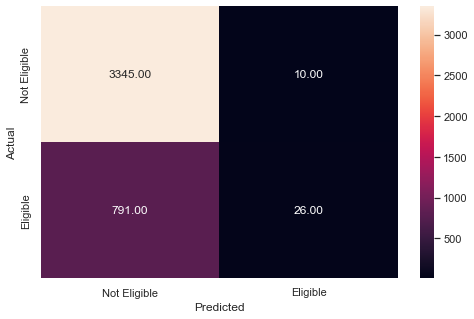

In [139]:
#Predict for train set
train_pred = lr.predict(X_train)

#checking the performance on the train dataset
metrics_score(y_train, train_pred) 

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1416
           1       0.50      0.01      0.02       372

    accuracy                           0.79      1788
   macro avg       0.65      0.50      0.45      1788
weighted avg       0.73      0.79      0.70      1788



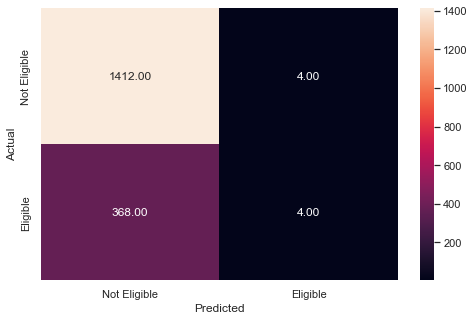

Score for Train DataSet
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      3355
           1       0.72      0.03      0.06       817

    accuracy                           0.81      4172
   macro avg       0.77      0.51      0.48      4172
weighted avg       0.79      0.81      0.73      4172



In [140]:
#Predict for test set
test_pred = lr.predict(X_test)

#checking the performance on the test dataset
metrics_score(y_test, test_pred)
print("Score for Train DataSet\n", classification_report(y_train, train_pred)) 

### **Standardize the Data for regularized Model** 

In [141]:
#For regularized Regression, we have to Standardize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
# X_scaled=(X - X.mean()) / X.std()
X1_train, X1_test, y1_train, y1_test = train_test_split(X_scaled, y, test_size = 0.30, random_state = 1)

### **Build a Lasso Logistic Regression Model**

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      3355
           1       0.74      0.33      0.46       817

    accuracy                           0.85      4172
   macro avg       0.80      0.65      0.68      4172
weighted avg       0.83      0.85      0.82      4172



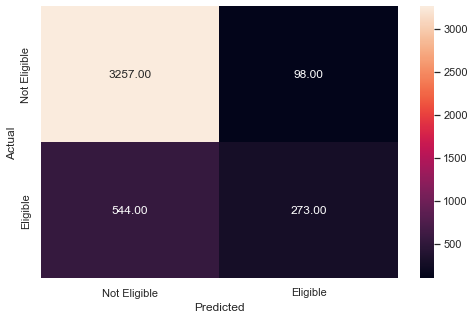

In [142]:
#l1 regularized regression
lrl1 = LogisticRegression(penalty="l1",solver="liblinear")
lrl1.fit(X1_train, y1_train)
train_pred = lrl1.predict(X1_train)

#checking the performance on the train dataset
metrics_score(y1_train, train_pred)  

- From the confusion matrix and evaluation scores, we can see that logistic regression with l1 regularization avoid overfitting (recall < 1) while having a higher precision than no-penalty regression(No. of true positives divided by total positive predictions)


- Recall shows the proportion of actual value correctedly predicted by our model. If recall is equal to 1, then our model correctedly predict all the actual y_train value which may indicate overfitting.

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1416
           1       0.70      0.28      0.40       372

    accuracy                           0.83      1788
   macro avg       0.77      0.63      0.65      1788
weighted avg       0.81      0.83      0.79      1788



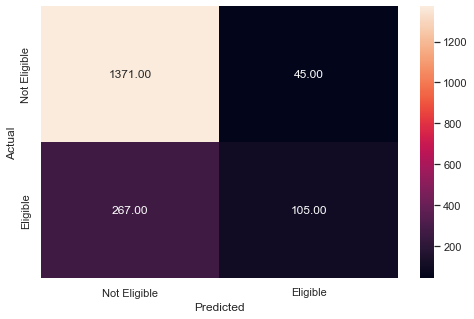

Score for Train DataSet
               precision    recall  f1-score   support

           0       0.86      0.97      0.91      3355
           1       0.74      0.33      0.46       817

    accuracy                           0.85      4172
   macro avg       0.80      0.65      0.68      4172
weighted avg       0.83      0.85      0.82      4172



In [143]:
#Predict for test set
test_pred = lrl1.predict(X1_test)

#checking the performance on the test dataset
metrics_score(y1_test, test_pred)
print("Score for Train DataSet\n", classification_report(y1_train, train_pred)) 

**Observations: __________**
- The recall for simple logistic regression is very low, only 0.01.


- Both lasso and ridge achieve a recall of 0.28, indicating 28% of actual eligible clients are predicted by the model. This is much lower than flagged data.


- The precision for ridge suggests that there's a 30% (1 - 0.7) chance that the model will predict that a person is not eligible but turn out to be eligible, and the company may waste their time and energy on these people who are not going to be converted.

#### Check the coefficients, and check which variables are important and how they affect the process of loan approval

In [146]:
# Printing the coefficients of regularized logistic regression
print("Coefficients:\n",lrl1.coef_)

coef_abs = np.abs(lrl1.coef_)
max_coefs = np.max(coef_abs,axis=0)
features=np.argpartition(max_coefs, -5)[-5:]

print("\nTop 5 Features:",[i for i in X.columns[features]])
print("Top 5 Features' Coefficient:",[round(i,3) for i in lrm.coef_[0][features]])

Coefficients:
 [[-0.20578764 -0.16261959  0.127161   -0.05304914  0.4924235   0.78835065
  -0.42062677  0.27937807 -0.14403511  0.57221536  0.10450221 -0.21390308
   0.         -0.00728986  0.10413279  0.09501032]]

Top 5 Features: ['NINQ', 'CLAGE', 'DELINQ', 'DEROG', 'DEBTINC']
Top 5 Features' Coefficient: [0.226, -0.415, 0.851, 0.455, 0.817]


**Insights**
- Most Important Varialbes are: 'NINQ', 'CLAGE', 'DELINQ', 'DEROG', 'DEBTINC'.

### **Build a Decision Tree Model**

In [147]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}
d_tree =  DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8})
#fitting Decision tree model
d_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8})

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



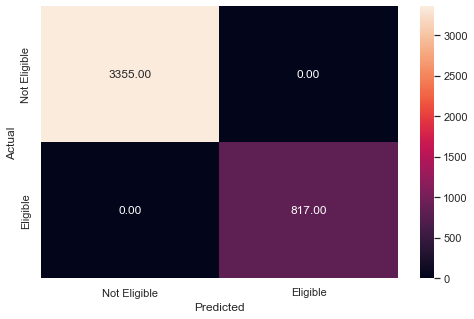

In [148]:
# Checking performance on the training data
y_pred_train = d_tree.predict(X_train)

metrics_score(y_train, y_pred_train)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1416
           1       0.68      0.61      0.64       372

    accuracy                           0.86      1788
   macro avg       0.79      0.77      0.78      1788
weighted avg       0.85      0.86      0.86      1788



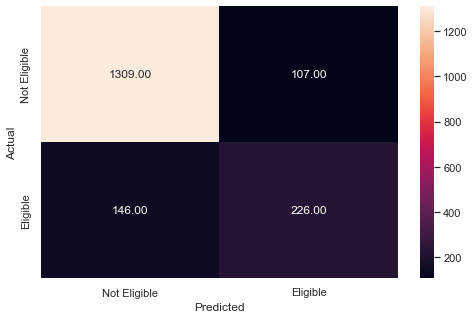

In [149]:
# Checking performance on the testing data
y_pred_test = d_tree.predict(X_test)

metrics_score(y_test, y_pred_test) 

**Insights**
- The Decision Tree works so well on the training data that recall and precision are all 1. However, it performs not so well on the test data as the recall is 0.61 in comparison to 1 for the training dataset. Therefore, the Decision Tree is overfitting the training data.

### **Decision Tree - Hyperparameter Tuning**

#### Using GridSearchCV for Hyperparameter tuning on the model

In [150]:
# Choose the type of classifier. 
d_tree_tuned = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state= 5)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(10, 20), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': np.arange(10, 30)
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

# Fit the GridSearch on train dataset
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=12,
                       min_samples_leaf=24, random_state=5)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      3355
           1       0.57      0.89      0.69       817

    accuracy                           0.85      4172
   macro avg       0.77      0.86      0.80      4172
weighted avg       0.89      0.85      0.86      4172



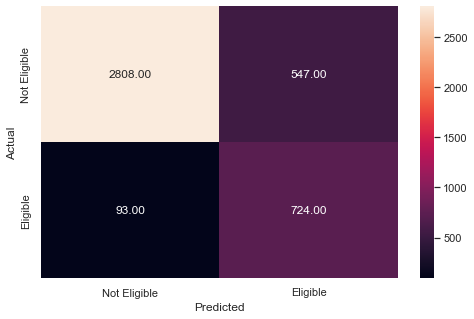

In [151]:
# Checking performance on the training data based on the tuned model
y_pred_train2 = d_tree_tuned.predict(X_train)

metrics_score(y_train, y_pred_train2)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      1416
           1       0.56      0.80      0.66       372

    accuracy                           0.83      1788
   macro avg       0.75      0.82      0.77      1788
weighted avg       0.86      0.83      0.84      1788



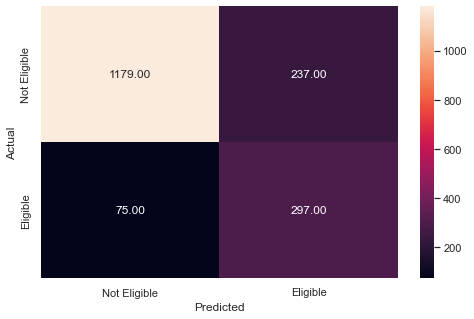

Report of Model_1 is 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91      1416
           1       0.68      0.61      0.64       372

    accuracy                           0.86      1788
   macro avg       0.79      0.77      0.78      1788
weighted avg       0.85      0.86      0.86      1788



In [152]:
# Checking performance on the testing data based on the tuned model
y_pred_test2 = d_tree_tuned.predict(X_test)

metrics_score(y_test, y_pred_test2)
print("Report of Model_1 is \n", classification_report(y_test, y_pred_test))

**Insights**
- Compared to Model_1, tuned model has a higher recall on model_1 and lower precision, f1 score is similar. This model is not overfitting the training data and giving approximately the same result on the test and train datasets. Recall is 0.8 for test vs 0.89 for train. The model also has a much higher recall than the model_1. However, the model perform worse on precision with only 56% of Eligible prediction correct.


- This shows that the tuned model capture 80% of eligible clients while predicting some non-eligible clients as eligible. Given that the bank want as few default clients as possible, recall, the fraction of relevant instances that were predicted by model, needs to be as high as possible. A model with high recall, despite lower precision allows the bank to holistically capture as many risky clients as possible, sacrificing the loss of some non-default clients.

#### Plotting the Decision Tree

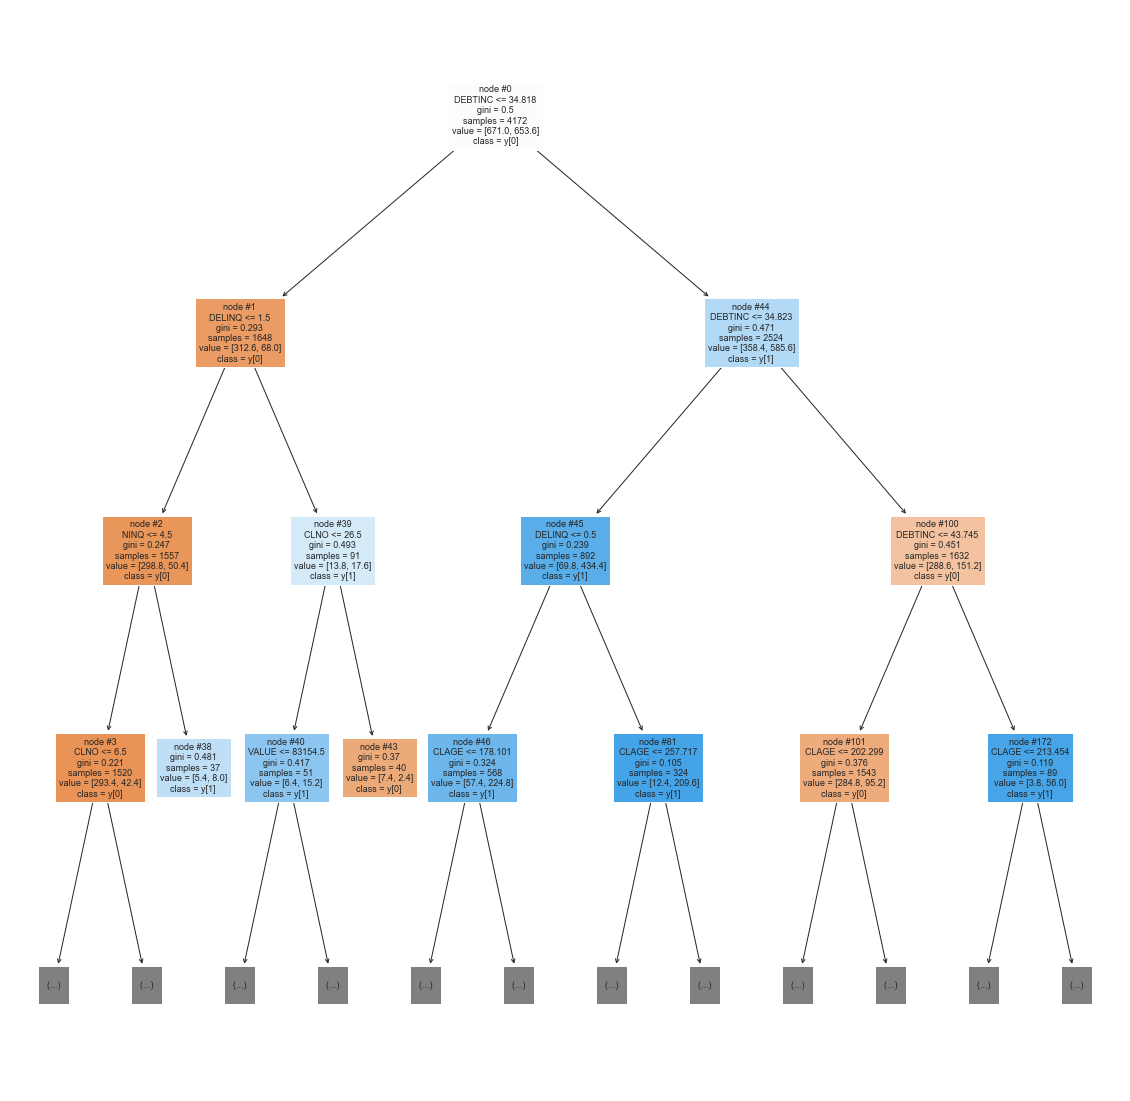

In [153]:
# Plot the decision tree and analyze it to build the decision rule
features = X.columns

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True, max_depth = 3)

plt.show()

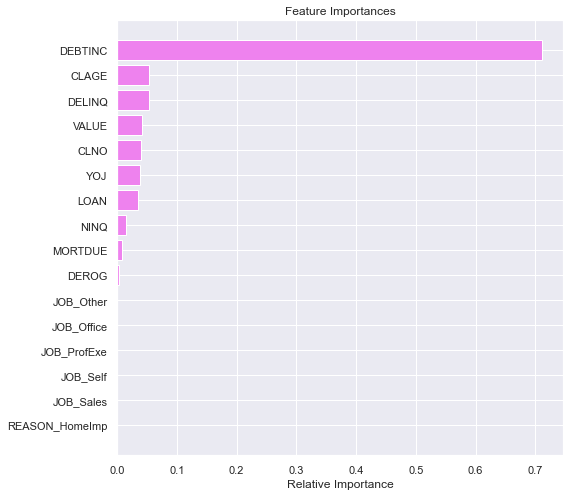

In [154]:
importances = d_tree_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = X.columns

plt.figure(figsize = (8, 8))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

#### Deduce the business rules apparent from the Decision Tree and write them down:
- **If clients have a Debt-to-income ratio > 44**, they are more likely to default


- **If clients have a Debt-to-income ratio more than 34, and have an deliquent credit line**, they are more likely to default


- **If clients have less than 34 Debt-to-income ratio, fewer than 1 deliquent credit line**, they are less likely to default

### **Building a Random Forest Classifier**

In [155]:
# Defining Random forest CLassifier
rf_estimator = RandomForestClassifier()

rf_estimator.fit(X_train, y_train)

RandomForestClassifier()

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



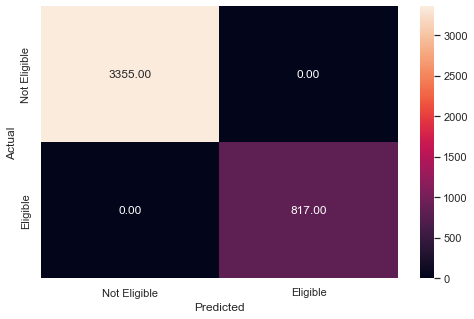

In [156]:
#Checking performance on the training data
y_pred_train3 = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train3)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1416
           1       0.91      0.65      0.76       372

    accuracy                           0.91      1788
   macro avg       0.91      0.82      0.86      1788
weighted avg       0.91      0.91      0.91      1788



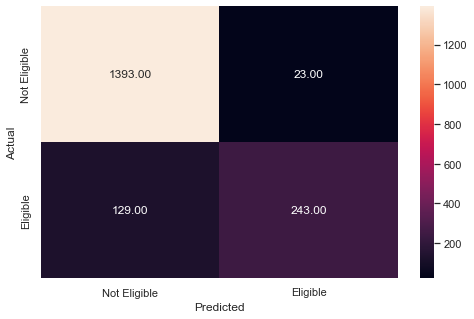

In [157]:
# Checking performance on the test data
y_pred_test3 = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test3)

**Observations:**
- The Random Forest classifier seems to be overfitting the training data. The recall on the training data is 1, while the recall on the test data is only ~ 0.7 for class 1.

- Precision is high for the test data than decision tree.

### **Build a Random Forest model with Class Weights**

In [158]:
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}
rf_estimator1 = RandomForestClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)

# Fitting Random Forest model
rf_estimator1.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



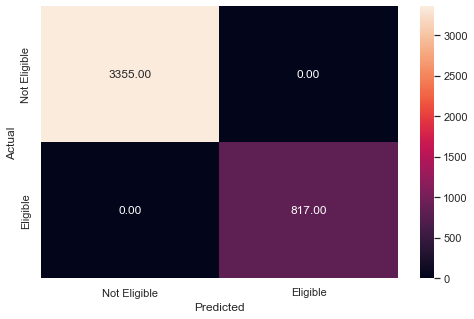

In [159]:
# Checking performance on the train data
y_pred_train4 = rf_estimator1.predict(X_train)

metrics_score(y_train, y_pred_train4)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1416
           1       0.89      0.65      0.75       372

    accuracy                           0.91      1788
   macro avg       0.90      0.82      0.85      1788
weighted avg       0.91      0.91      0.91      1788



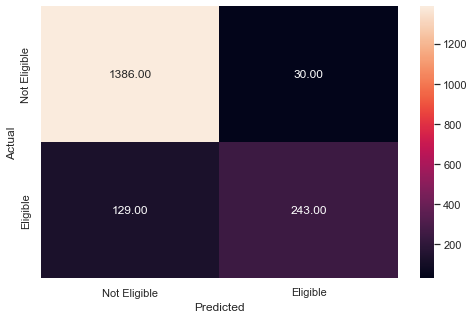

In [160]:
# Checking performance on the test data
y_pred_test4 = rf_estimator1.predict(X_test)

metrics_score(y_test, y_pred_test4)

### **Think about it:**
- Can we try different weights? - Yes we will use hyperparamter tuning
- If yes, should we increase or decrease class weights for different classes? - try through tuning

### **Tuning the Random Forest**

#### **Warning:** This may take a long time depending on the parameters you tune. 

In [161]:
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)


# Grid of parameters to choose from
parameters = {'class_weight': [{0: 0.5, 1: 0.5},{0: 0.3, 1: 0.7},{0: 0.2, 1: 0.8}],
    "n_estimators": [90,100,105,110],
    "max_depth": [3,4,5],
    "max_features": [0.7,0.8,0.9],
    "min_samples_leaf": [30,35,40]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

#fit the GridSearch on train dataset
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [162]:
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       max_depth=4, max_features=0.7, min_samples_leaf=30,
                       n_estimators=90, random_state=7)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.94      0.89      0.92      3355
           1       0.63      0.78      0.70       817

    accuracy                           0.87      4172
   macro avg       0.79      0.83      0.81      4172
weighted avg       0.88      0.87      0.87      4172



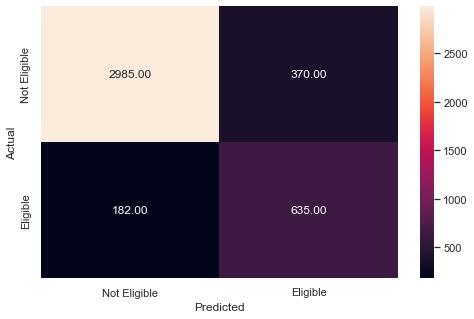

In [163]:
# Checking performance on the training data
y_pred_train5 = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train5)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      1416
           1       0.65      0.73      0.69       372

    accuracy                           0.86      1788
   macro avg       0.79      0.81      0.80      1788
weighted avg       0.87      0.86      0.87      1788



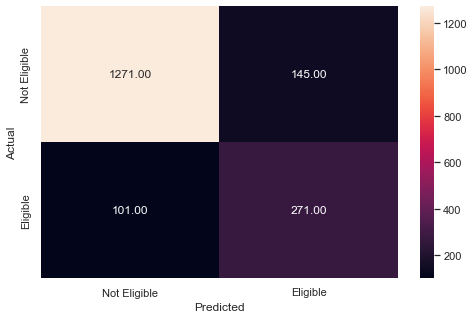

In [164]:
# Checking performace on test dataset
y_pred_test5 = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test5)

**Insights:**
- The tuned model reduce significantly the overfitting issue, and it has 0.74 recall.
- The model has a precision of 0.65 on test set
- overall accuracy is 0.65
- The Company want the recall to be maximized. The greater the Recall score, the higher the chances of minimizing False Negatives. The higher the chance that the company can capture as many risky clients as possible.
- Compared to decision tree model, random forest is less intepretable and cannot draw a tree like decision tree

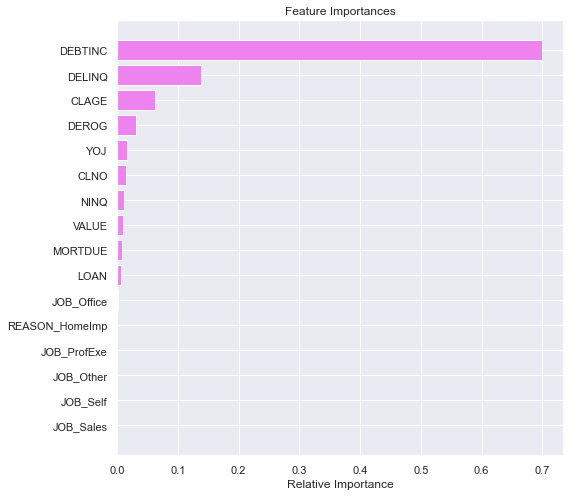

In [165]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Checking performace on test dataset
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = X.columns

plt.figure(figsize = (8, 8))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

### Evaluation for Flagged Dataset

## **Model Evaluation Criterion**
#### After understanding the problem statement, think about which evaluation metrics to consider and why. 

In [71]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Comparing Model Performances**

In [168]:
def get_recall_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [169]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [170]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [171]:
# Make the list of all the model names 

models = [lr,lrl1,d_tree,d_tree_tuned,rf_estimator,rf_estimator1,rf_estimator_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [173]:
# Mention the Model names in the list. for example 'Model': ['Decision Tree', 'Tuned Decision Tree'..... write tht names of all model built]

comparison_frame_unflagged = pd.DataFrame({'Model':["LogisticRegression(No Penalty)","LogisticRegression('l1')",
                                          "DecisionTree","DecisionTree_Tuned","Random Forest(Default)","Random Forest(class_weight)",
                                          "Random Forest_Tuned"], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 

comparison_frame_unflagged.iloc[0,[1,2,3,4,5,6]] = [0.79,0.81,0.03,0.01,0.72,0.5]
comparison_frame_unflagged.iloc[1,[1,2,3,4,5,6]] = [0.85,0.83,0.33,0.28,0.74,0.7]
comparison_frame_unflagged

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,LogisticRegression(No Penalty),0.790000,0.810000,0.030000,0.010000,0.720000,0.500000
1,LogisticRegression('l1'),0.850000,0.830000,0.330000,0.280000,0.740000,0.700000
2,DecisionTree,1.000000,0.858501,1.000000,0.607527,1.000000,0.678679
3,DecisionTree_Tuned,0.846596,0.825503,0.886169,0.798387,0.569630,0.556180
4,Random Forest(Default),1.000000,0.914989,1.000000,0.653226,1.000000,0.913534
5,Random Forest(class_weight),1.000000,0.911074,1.000000,0.653226,1.000000,0.890110
6,Random Forest_Tuned,0.867689,0.862416,0.777234,0.728495,0.631841,0.651442


In [321]:
#Flagged evaluation result
comparison_frame_flagged

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,LogisticRegression(No Penalty),0.810000,0.790000,0.040000,0.010000,0.740000,0.500000
1,LogisticRegression('l1'),0.890000,0.890000,0.630000,0.620000,0.780000,0.820000
2,DecisionTree,1.000000,0.865772,1.000000,0.618280,1.000000,0.701220
3,DecisionTree_Tuned,0.863135,0.838367,0.884945,0.776882,0.602500,0.583838
4,Random Forest(Default),1.000000,0.914989,1.000000,0.706989,1.000000,0.859477
5,Random Forest(class_weight),1.000000,0.907159,1.000000,0.666667,1.000000,0.855172
6,Random Forest_Tuned,0.870566,0.864653,0.787026,0.744624,0.637265,0.653302


## Comparing Flagged and Unflagged Data

In [349]:
def compare_model(criteria):
    x_axis = np.arange(7)

    plt.figure(figsize = (15, 10))

    plt.title('Flagged and Unflagged Model {}'.format(criteria),fontdict={'fontsize': 15})

    plt.bar(x_axis-0.1, comparison_frame_unflagged[criteria],
         width = 0.4, color = sns.xkcd_rgb["pale red"],label="unflagged")

    plt.bar(x_axis+0.3, comparison_frame_flagged[criteria],
        width = 0.4, color = sns.xkcd_rgb["medium green"],label="flagged")
    
    for i in range(7):
        plt.text(i-0.2,comparison_frame_unflagged.loc[i,criteria]+0.01,
                 s=round(comparison_frame_unflagged.loc[i,criteria],3))
    
    for i in range(7):
        plt.text(i+0.25,comparison_frame_flagged.loc[i,criteria]+0.01,
                 s=round(comparison_frame_flagged.loc[i,criteria],3))
    
    plt.xlabel("Models")
    plt.xticks(np.arange(7),comparison_frame_unflagged['Model'], fontsize = 15, rotation=75)
    plt.legend(prop={'size': 12})

    plt.show()

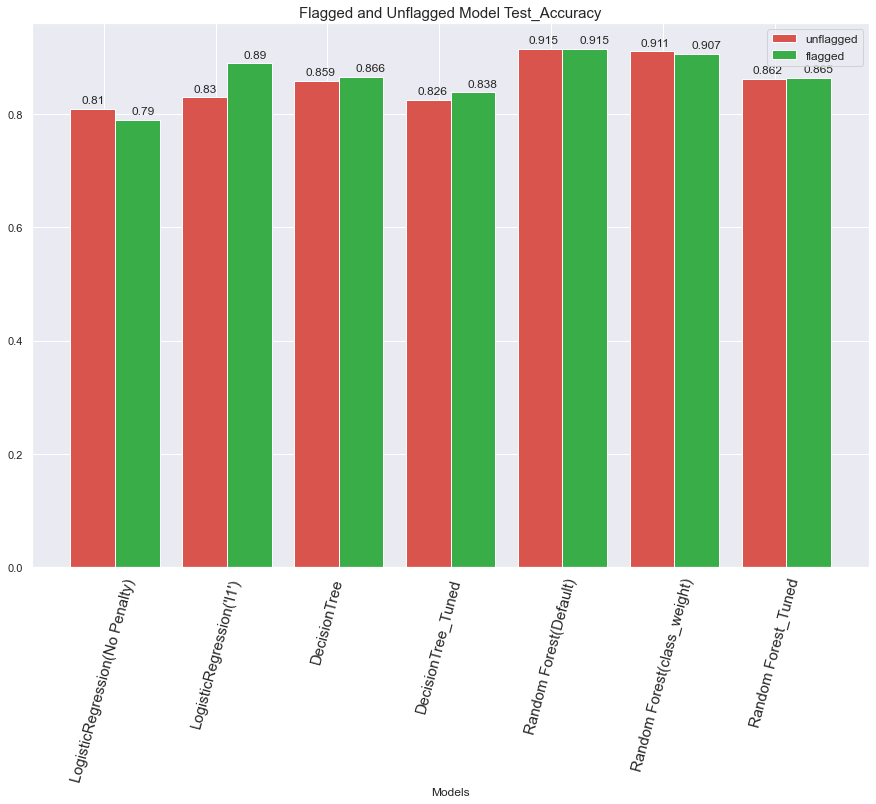

In [350]:
compare_model("Test_Accuracy")

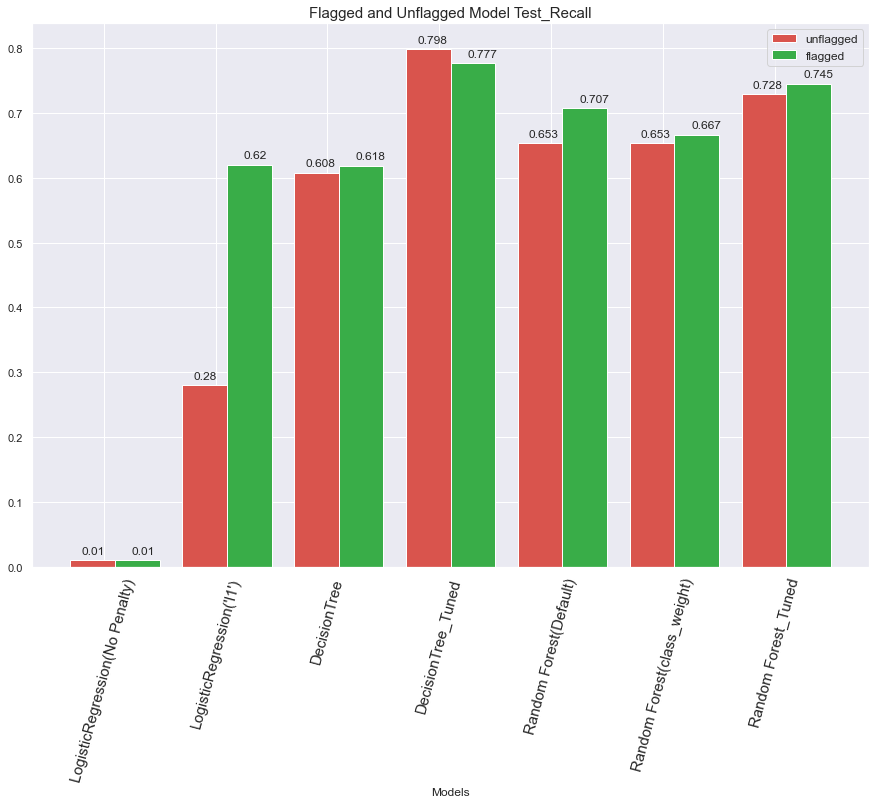

In [351]:
compare_model("Test_Recall")

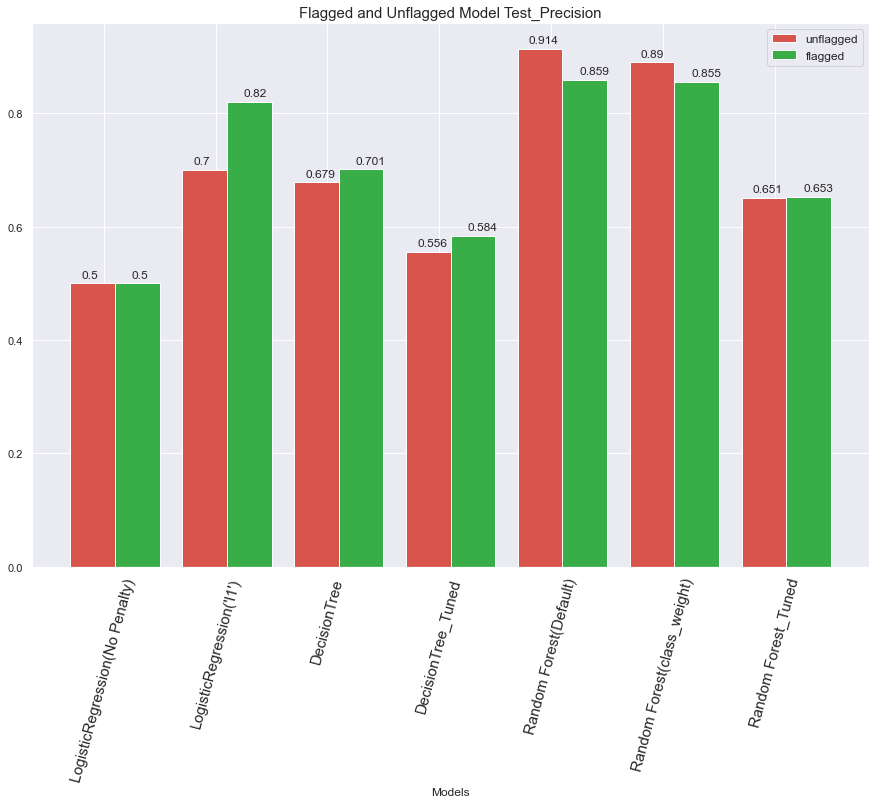

In [352]:
compare_model("Test_Precision")

**Insights:**
- From the Summary of models on flagged and unflagged dataset, we will use the flagged dataset for modeling. The model,excluding overfited models, with the **highest Test Accuracy is logistic regression(l1), highest Test_Recall is DecisionTree_Tuned, highest Test_Precision is logistic regression(l1).** 


- Banks want to **maximize recall** for the model needs to identify as many risky clients as possible, even if the precision of the prediction is not very high. Therefore, **tuned decision tree may be the best model given its 0.8 recall. The next best model is random forest_tuned**, the model has decent recall (0.73) and much better precision (0.65) and accuracy(0.86) than tuned decision tree. The tuned random forest model also avoid overfitting problem.

**1. Refined insights -** What are the most meaningful insights from the data relevant to the problem?

- Models indicates that the most important factors to consider when determine the default risk of a clients are: Debt-to-income Ratio, Number of Delinquent Accounts, Age of the oldest credit line in months, whether there is a derogatory reports, years of job experience. Loan value does not have substantial effect on loan

**2. Comparison of various techniques and their relative performance -** How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

- Decision Tree seems to perform better overall on recall while random forest better on accuracy and precision.


- Logistic regression does not have a good recall but the accuracy is fairly high. The model can be improved if we consider imbalance sample effect and other regularization measures.


- Due to the calculation power limitation, we did not tune a lot of hyperparameters with random forest model and we can in the future find the best hyperparameters.


- We can also use other models like SVM and KNN to improve the chance of finding the best model


- Random forest model is not as intepretable as the decision tree model. The lack of interpretability limits the random forest model's use in some specific fields. The random forest is commonly interpreted with only feature importance and proximity plots. These visualizations are very useful but not sufficient.

**3. Proposal for the final solution design -** What model do you propose to be adopted? Why is this the best solution to adopt?

- I purpose to adopt tuned decision tree model. Although the precision is lower, 58% of time the predicted risky clients indeed default, this model can capture ~80% clients that actually default. Banks can use this model as a good starting point to identify risky clients/applications and conduct more precised research on them.


- The bank can also adopt the tuned random forest model. The model can predict 75% acutal defaulted clients, with a total prediction accuracy of more than 65%. Although the model capture 5% fewer actual default client than the decision tree model, the precision is much higher. Banks may sacrifice some prediction comprehensiveness in exchange for higher precision and cost-saving.